In [1]:
import json
import os
import os.path
import matplotlib.pyplot as plt
import numpy as np
import glob
import copy
import shutil
import os.path

from copy import deepcopy
from os.path import exists, join
from collections import defaultdict

In [2]:
def load_algo_names():
    with open('stl_algo_names.txt') as f:
        content = f.readlines()
    content = [line for line in content if not line.startswith('//')]
    content = [line.replace(',', '') for line in content]
    content = [x.replace('"', '') for line in content for x in line.split()]
    # flatten list

    return content

def load_algo_names_by_kind():
    with open('stl_algo_names_by_kind.json') as f:
        content = json.load(f)

    return content

# FEATURES_FOLDER = '/home/cdragancea/MastersThesis/FBACode/analyze'
FEATURES_FOLDER = '/home/constantin/Projects/MastersThesis/FBACode/analyze'


In [3]:
# load the outputs from the analyze/ folder
stats = dict()
analyze_summary = dict()

with open(f"{FEATURES_FOLDER}/analyze_summary.json", "r") as fin:
    analyze_summary = json.load(fin)

counter = 0
for project_name in os.listdir(FEATURES_FOLDER):
    # print(f"Loading overall_stats for {project_name}")
    # if project_name == "analyze_summary.json":
    # if project_name == "analyze_summary.json" or project_name == "analyze_summary2.json":
    if project_name.startswith("analyze_summary") or project_name.startswith("job_distribution"):
        continue
    if not exists(join(FEATURES_FOLDER, project_name, 'overall_stats')) or project_name not in analyze_summary:
        print(f"Skipping {project_name} because it does not have overall_stats.")
        counter += 1
        # if project_name in analyze_summary:
        #     analyze_summary.pop(project_name)
        # shutil.rmtree(join(FEATURES_FOLDER, project_name), ignore_errors=True)
        continue
    if analyze_summary[project_name]["analysis status"] != "success":
        continue

    with open(join(FEATURES_FOLDER, project_name, 'overall_stats')) as f:
        content = f.read()
    try:
        overall_stats = json.loads(content)
    except json.JSONDecodeError as e:
        str_err = str(e)
        line = int(str_err.split()[3]) - 1
    
    individual_features = json.loads('\n'.join(content.split('\n')[:line]))
    overall_features = json.loads('\n'.join(content.split('\n')[line:]))
    stats[project_name] = {
        'individual_features': individual_features,
        'overall_features': overall_features
    }

project_names = list(stats.keys())
# with open(f"{FEATURES_FOLDER}/analyze_summary2.json", "w") as fout:
#     fout.write(json.dumps(analyze_summary, indent=4))

Skipping passenger because it does not have overall_stats.
Skipping mozjs102 because it does not have overall_stats.
Skipping ruby3.1 because it does not have overall_stats.
Skipping quantlib-swig because it does not have overall_stats.
Skipping boswars because it does not have overall_stats.
Skipping bluez-qt because it does not have overall_stats.
Skipping csstidy because it does not have overall_stats.
Skipping audacity because it does not have overall_stats.
Skipping tolua++ because it does not have overall_stats.
Skipping pugl because it does not have overall_stats.
Skipping COMMENT because it does not have overall_stats.
Skipping octave-instrument-control because it does not have overall_stats.
Skipping vulkan-validationlayers because it does not have overall_stats.
Skipping libdnf because it does not have overall_stats.
Skipping faiss because it does not have overall_stats.
Skipping libint2 because it does not have overall_stats.
Skipping libabigail because it does not have over

In [4]:
print(len(list(stats.keys())))
print(f"Skipped {counter} projects.")
print(len([(k,v) for (k,v) in analyze_summary.items() if v['analysis status'] == 'success']))
print(len([(k,v) for (k,v) in analyze_summary.items() if v['analysis status'] != 'success']))

4272
Skipped 55 projects.
4272
39


In [5]:

counter = 0
no_loops_project = 0
for pname, project in stats.items():
    if project['individual_features'] is None:
        continue
    if len(project['individual_features'].keys()) > 0:
        counter += 1
    total_loops = sum([apps for (loop, apps) in project['overall_features']['loop kind prevalences'].items()])
    if total_loops == 0:
        # print(f"{pname} uses 0 loops")
        no_loops_project += 1
    
print(f"Projects with at least 1 feature file: {counter}")
print(f"Projects with 0 loops: {no_loops_project}")

print(f"Projects marked as successful but have non-zero ret code: {len([pname for pname, project in stats.items() if analyze_summary[pname]['analysis status'] == 'success' and (analyze_summary[pname]['analysis emit-features retcode'] != 0 or analyze_summary[pname]['analysis emit-stats retcode'] != 0)])}")

possible_retcodes_emit_features = set([analyze_summary[pname]['analysis emit-features retcode'] for pname in stats.keys()])
possible_retcodes_emit_stats = set([analyze_summary[pname]['analysis emit-stats retcode'] for pname in stats.keys()])

print(f"Possible return codes for emit-features: {possible_retcodes_emit_features}")
print(f"Possible return codes for emit-stats: {possible_retcodes_emit_stats}")

bad_retcodes = [pname for pname, project in stats.items() if analyze_summary[pname]['analysis status'] == 'success' and (analyze_summary[pname]['analysis emit-features retcode'] != 0 or analyze_summary[pname]['analysis emit-stats retcode'] != 0)]

feature_sizes_for_bad_retcode = set([len(stats[pname]['individual_features']) for pname in bad_retcodes if stats.get(pname, None) is not None and stats[pname].get('individual_features', None) is not None])
print(feature_sizes_for_bad_retcode)

for pname in bad_retcodes:
    if stats.get(pname, None) is not None and stats[pname].get('individual_features', None) is not None:
        print(f"{pname} has {len(stats[pname]['individual_features'])} feature files")
        if len(stats[pname]['individual_features']) < 10:
            print(stats[pname]['individual_features'])
print(stats['abseil']['individual_features'])

Projects with at least 1 feature file: 3764
Projects with 0 loops: 108
Projects marked as successful but have non-zero ret code: 0
Possible return codes for emit-features: {0}
Possible return codes for emit-stats: {0}
set()
{'/home/fba_code/analyze/shared/CMakeFiles/3.25.1/CompilerIdCXX/CMakeCXXCompilerId.ast.json': {'algorithm type prevalence': {}, 'container type prevalence': {}, 'container instantiation type arguments': {}, 'promise, future usage': {'tia explicit class insts': {}, 'tia templated class uses': {}}, 'async usage': {'tia templated func uses': {}, 'tia explicit func insts': {}}, 'atomic usage': {'tia explicit class insts': {}, 'tia templated class uses': {}}, 'thread usage': {'as variable declarations': 0, 'total count': 0, 'as function return types': 0, 'as temporary expressions': 0, 'as new pointer expressions': 0}, 'mutex usage': {'as variable declarations': 0, 'total count': 0, 'as function return types': 0, 'as temporary expressions': 0, 'as new pointer expressions'

In [6]:
nr_of_algos = []
algo_names = load_algo_names()
# nr_of_algo_uses = {name: 0 for name in algo_names}
nr_of_algo_uses = defaultdict(int)

project_to_algo_calls = defaultdict(int)
project_to_distinct_algo_calls = defaultdict(int)

for name in algo_names:
    nr_of_algo_uses[name] = 0

for project_name in project_names:
    project = stats[project_name]
    if project['overall_features'] is None:
        # print(f"{project_name} has empty overall_features")
        nr_of_algos.append(0)
        project_to_algo_calls[project_name] = 0
        project_to_distinct_algo_calls[project_name] = 0
        continue

    if 'algorithm type prevalence' not in project['overall_features']:
        # print(f"{project_name} has no algorithm type prevalence")
        project_to_algo_calls[project_name] = 0
        project_to_distinct_algo_calls[project_name] = 0
        nr_of_algos.append(0)
        continue
    # print(f'project name: {project_name}')
    if project['overall_features']['algorithm type prevalence'] is None:
        # print(f"{project_name} has empty algorithm type prevalence")
        project_to_algo_calls[project_name] = 0
        project_to_distinct_algo_calls[project_name] = 0
        nr_of_algos.append(0)
        continue
    project_to_algo_calls[project_name] = sum([v for (_, v) in project['overall_features']['algorithm type prevalence'].items()])
    project_to_distinct_algo_calls[project_name] = len([k for (k, v) in project['overall_features']['algorithm type prevalence'].items() if v > 0])

    nr_of_algos.append(sum([v for (_, v) in project['overall_features']['algorithm type prevalence'].items()]))
    for algo_name, algo_uses in project['overall_features']['algorithm type prevalence'].items():
        nr_of_algo_uses[algo_name] += algo_uses

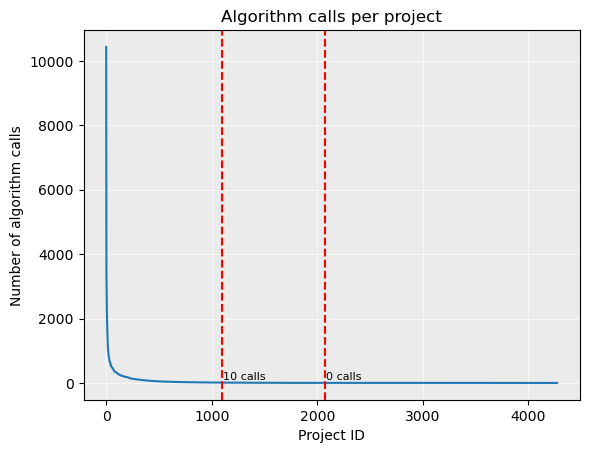

In [7]:
# number of algos used per project
# unique_values, frequencies = np.unique(nr_of_algos, return_counts=True)
nr_of_algos_per_project = sorted(nr_of_algos, reverse=True)
first_0 = nr_of_algos_per_project.index(0)
first_10 = nr_of_algos_per_project.index(10)

# Step 4: Plot the frequencies
fig, ax = plt.subplots(1, 1)
fig.patch.set_facecolor('xkcd:white')

plt.grid(color='w', linestyle='-', linewidth=0.5)
ax.set_facecolor((0.92, 0.92, 0.92))

plt.plot(nr_of_algos_per_project)
plt.axvline(x = first_0, color='r', linestyle='--')
plt.text(first_0 + 10, 100, '0 calls', color='black', fontsize=8, ha='left')

plt.axvline(x = first_10, color='r', linestyle='--')
plt.text(first_10 + 10, 100, '10 calls', color='black', fontsize=8, ha='left')

# plt.bar(nr_of_algos_per_project, align='center', alpha=0.5)
plt.xlabel('Project ID')
plt.ylabel('Number of algorithm calls')
plt.title('Algorithm calls per project')
# plt.xticks([])
# plt.grid(True)
plt.savefig('./plots/algo_calls.png', dpi=500, bbox_inches='tight')
plt.show()


In [8]:
print({k : v for k, v in nr_of_algo_uses.items() if v > 10})
print(sorted(nr_of_algo_uses.items(), key=lambda x: x[1], reverse=True))

{'std::for_each': 2951, 'std::all_of': 672, 'std::any_of': 1115, 'std::none_of': 158, 'std::find': 7726, 'std::find_if': 4530, 'std::find_if_not': 107, 'std::find_end': 16, 'std::find_first_of': 37, 'std::adjacent_find': 83, 'std::count': 533, 'std::count_if': 366, 'std::mismatch': 55, 'std::equal': 774, 'std::search': 92, 'std::copy': 7871, 'std::copy_if': 253, 'std::copy_n': 3171, 'std::copy_backward': 360, 'std::move': 612, 'std::move_backward': 134, 'std::swap': 15662, 'std::swap_ranges': 40, 'std::iter_swap': 315, 'std::transform': 5819, 'std::replace': 463, 'std::replace_if': 54, 'std::fill': 3061, 'std::fill_n': 9120, 'std::generate': 132, 'std::generate_n': 53, 'std::remove': 683, 'std::remove_if': 1120, 'std::remove_copy_if': 56, 'std::unique': 722, 'std::unique_copy': 15, 'std::reverse': 1649, 'std::reverse_copy': 92, 'std::rotate': 81, 'std::random_shuffle': 147, 'std::shuffle': 210, 'std::partition': 76, 'std::stable_partition': 58, 'std::partition_point': 26, 'std::sort': 

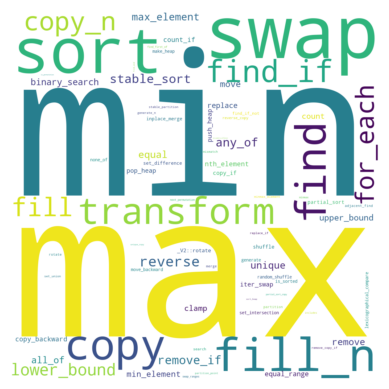

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def generate_algo_calls_wordcloud():
    # Create a wordcloud object
    wordcloud = WordCloud(width = 1200, height = 1200, background_color='white')
    # wordcloud = WordCloud(width = 1200, height = 1200)

    # Generate the wordcloud from a text
    # text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua."
    nr_of_algo_uses_without_std = {k.replace('std::', '') : v for k, v in nr_of_algo_uses.items()}
    wordcloud.generate_from_frequencies(nr_of_algo_uses_without_std)

    # Display the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    wordcloud.to_file('wordcloud.png')

generate_algo_calls_wordcloud()


In [10]:
# Get SLOC for each project
file_list = [
    "debian-all-cpp-projects.json",
]

sloc_info = {}

for file_name in file_list:
    with open(f"../examples/{file_name}", "r") as fin:
        data = json.load(fin)["debian"]
        for project in data:
            cpp_lines = [x[1] for x in data[project]["codebase_data"]["sloc"] if x[0] == "cpp"]
            sloc_info[project] = cpp_lines[0]

# print(json.dumps(sloc_info, indent=4))

Total number of projects: 4272
4272


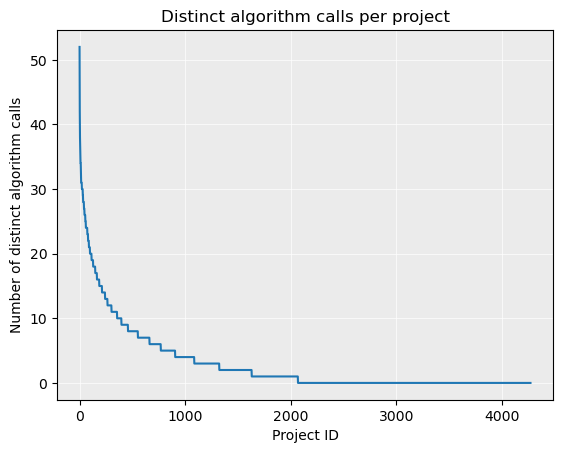

In [11]:
def plot_algo_calls_by_distinct_algos():
    # number of algos used per project
    # unique_values, frequencies = np.unique(nr_of_algos, return_counts=True)
    pname_and_nr_of_algos = []

    for project_name in project_names:
        project = stats[project_name]
        if project['overall_features'] is None:
            # print(f"{project_name} has empty overall_features")
            pname_and_nr_of_algos.append((project_name, 0))
            continue

        if 'algorithm type prevalence' not in project['overall_features']:
            # print(f"{project_name} has no algorithm type prevalence")
            pname_and_nr_of_algos.append((project_name, 0))
            continue
        # print(f'project name: {project_name}')
        if project['overall_features']['algorithm type prevalence'] is None:
            # print(f"{project_name} has empty algorithm type prevalence")
            pname_and_nr_of_algos.append((project_name, 0))
            continue
        pname_and_nr_of_algos.append((project_name, sum([min(1, v) for (_, v) in project['overall_features']['algorithm type prevalence'].items()])))
        # for algo_name, algo_uses in project['overall_features']['algorithm type prevalence'].items():
        #     nr_of_algo_uses[algo_name] += algo_uses

    # project_and_algo_uses = [(k, v) for k, v in pname_and_nr_of_algos.items()]
    project_and_algo_uses = sorted(pname_and_nr_of_algos, reverse=True, key = lambda x: x[1])
    # sloc_per_project = [sloc_info[project] for (project, _) in project_and_algo_uses]

    nr_of_algos_per_project = [project_and_algo_uses[i][1] for i in range(len(project_and_algo_uses))]
    nr_of_algos_per_project = sorted(nr_of_algos_per_project, reverse=True)

    print(f"Total number of projects: {len(nr_of_algos_per_project)}")
    print(len(project_names))

    # first_0 = nr_of_algos_per_project.index(0)
    # first_10 = nr_of_algos_per_project.index(10)

    # Step 4: Plot the frequencies
    fig, ax = plt.subplots(1, 1)
    fig.patch.set_facecolor('xkcd:white')

    plt.grid(color='w', linestyle='-', linewidth=0.5)
    ax.set_facecolor((0.92, 0.92, 0.92))

    plt.plot(nr_of_algos_per_project)
    # plt.axvline(x = first_0, color='r', linestyle='--')
    # plt.text(first_0 + 10, 100, '0 calls', color='black', fontsize=8, ha='left')

    # plt.axvline(x = first_10, color='r', linestyle='--')
    # plt.text(first_10 + 10, 100, '10 calls', color='black', fontsize=8, ha='left')

    # plt.bar(nr_of_algos_per_project, align='center', alpha=0.5)
    plt.xlabel('Project ID')
    plt.ylabel('Number of distinct algorithm calls')
    plt.title('Distinct algorithm calls per project')
    # plt.xticks([])
    # plt.grid(True)
    plt.savefig('./plots/algo_calls_distinct.png', dpi=500, bbox_inches='tight')
    plt.show()

plot_algo_calls_by_distinct_algos()


In [12]:
with open("./data/algo_uses/nr_for_each_algo.txt", "w") as fout:
    for k, v in sorted(list(nr_of_algo_uses.items()), key=lambda x: x[1], reverse=True):
        fout.write(f"{k} {v}\n")

In [13]:
with open("./data/algo_uses/nr_for_each_proj.txt", "w") as fout:
    lines = []
    for k, v in sorted(list(zip(project_names, nr_of_algos)), key=lambda x: x[1], reverse=True):
        if k in sloc_info:
            lines.append((k, v, sloc_info[k], v / sloc_info[k]))
        # fout.write(f"{k} {v} {sloc_info[k]} {v / sloc_info[k]}\n")
        else:
            lines.append((k, v, 0, 0))
            # fout.write(f"{k} {v}\n")
    
    print(lines[:10])
    for line in sorted(lines, key = lambda x: x[1], reverse=True):
        fout.write(f"{line[0]} {line[1]} {line[2]} {line[3]}\n")
        # fout.write(f"{line[0]} {line[1]}\n")

[('bagel', 10437, 1236565, 0.008440316521978223), ('opencv', 3768, 1079020, 0.0034920576078293266), ('quantlib', 3509, 389443, 0.009010304460473035), ('octave', 2973, 332823, 0.008932675926843998), ('rawtherapee', 2846, 255108, 0.011156059394452546), ('praat', 2649, 858076, 0.0030871391345288763), ('crawl', 2398, 326715, 0.007339730346020232), ('gdal', 1966, 1136033, 0.0017305835305840588), ('libmaus2', 1953, 300951, 0.006489428511618171), ('seqan2', 1764, 256886, 0.006866859229385798)]


In [14]:
with open("./data/algo_uses/nr_for_each_proj_distinct.txt", "w") as fout:
    lines = []
    for k, v in project_to_distinct_algo_calls.items():
        if k in sloc_info:
            lines.append((k, v, sloc_info[k], v / sloc_info[k]))
        else:
            lines.append((k, v, 0, 0))
    
    lines = sorted(lines, key = lambda x: x[1], reverse=True)
    print(lines[:10])
    for line in lines:
        fout.write(f"{line[0]} {line[1]} {line[2]} {line[3]}\n")
        # fout.write(f"{line[0]} {line[1]}\n")

[('wesnoth-1.16', 52, 240905, 0.0002158527220273552), ('qt6-base', 44, 1766049, 2.4914371005561002e-05), ('dolphin-emu', 42, 528500, 7.947019867549669e-05), ('libtorrent-rasterbar', 39, 178209, 0.00021884416611955626), ('nlohmann-json3', 38, 101475, 0.00037447647203744765), ('kicad', 37, 633548, 5.840125767897618e-05), ('opencv', 36, 1079020, 3.3363607718114586e-05), ('cmake', 36, 250806, 0.00014353723595129304), ('warzone2100', 35, 529389, 6.61139540111336e-05), ('onevpl-intel-gpu', 34, 388388, 8.754132465472672e-05)]


In [15]:
def list_algo_uses_for_projects(projects):
    for project_name in projects:
        with open(f"./data/algo_uses_per_project/{project_name}.txt", "w") as fout:
            algo_calls = [(k, v) for k, v in stats[project_name]['overall_features']['algorithm type prevalence'].items() if v > 0]
            algo_calls = sorted(algo_calls, key=lambda x: x[1], reverse=True)

            fout.write(f"Distinct algo calls (> 0) in project: {len(algo_calls)}\n")
            fout.write("algo_name,total_algo_calls\n")
            for algo_name, algo_uses in algo_calls:
                fout.write(f"{algo_name.replace('std::','')},{algo_uses}\n")
            

list_algo_uses_for_projects(["bagel", "opencv", "quantlib", "octave", "rawtherapee"])

In [16]:
# with open("nr_for_each_algo_no_praat.txt", "w") as fout:
#     this_data = {k: v for k, v in nr_of_algo_uses.items()}
#     # for k, v in stats["praat"]["overall_features"]["algorithm type prevalence"].items():
#     #     this_data[k] -= v
#     for k, v in sorted(list(this_data.items()), key=lambda x: x[1], reverse=True):
#         fout.write(f"{k} {v}\n")

In [17]:
# Total number of projects
print(f"Total number of projects: {len(project_names)}")

# How many have less than X algos
X = 0
print(f"Projects with less than {X} algo usages: {len([x for x in nr_of_algos if x <= X])}")

Total number of projects: 4272
Projects with less than 0 algo usages: 2204


In [56]:
def plot_by_kind(algo_kind, algo_names):
    print(f"Plotting uses for {algo_kind}")
    values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    print("initial values:")
    print(values)

    print(f"Nr of algos that are not used for {algo_kind}: {len([x for x in values if x[1] == 0])}")
    
    zero_values = [x for x in values if x[1] == 0]
    if len(values) > 15:
        values = [x for x in values if x[1] > 0]
    # values.append( ('\n'.join([x[0] for x in zero_values]), 0) )

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    fig, ax = plt.subplots(1, 1)
    fig.patch.set_facecolor('xkcd:white')
    plt.grid(color='w', linestyle='-', linewidth=0.5, zorder=0)
    ax.grid(zorder=0)
    ax.set_facecolor((0.92, 0.92, 0.92))

    plt.bar(x_axis, y_axis, align='center', alpha=0.5, zorder=3)
    plt.xlabel('Algorithm name')
    plt.ylabel('Number of algorithm calls')
    plt.title(f'Frequency of \"{algo_kind}\" STL algorithms')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    # plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/{algo_kind.replace('/', ' or ')}.png", bbox_inches='tight')
    plt.close(fig)
    # plt.show()

In [57]:
algo_names_by_kind = load_algo_names_by_kind()
for algo_kind, algo_names in algo_names_by_kind.items():
    plot_by_kind(algo_kind, algo_names)

Plotting uses for Batch operations
initial values:
[('std::for_each', 2951), ('std::for_each_n', 0)]
Nr of algos that are not used for Batch operations: 1
Plotting uses for Search operations
initial values:
[('std::find', 7726), ('std::find_if', 4530), ('std::any_of', 1115), ('std::equal', 774), ('std::all_of', 672), ('std::count', 533), ('std::count_if', 366), ('std::none_of', 158), ('std::find_if_not', 107), ('std::search', 92), ('std::adjacent_find', 83), ('std::mismatch', 55), ('std::find_first_of', 37), ('std::find_end', 16), ('std::search_n', 0)]
Nr of algos that are not used for Search operations: 1
Plotting uses for Modifying sequence operations
initial values:
[('std::swap', 15662), ('std::fill_n', 9120), ('std::copy', 7871), ('std::transform', 5819), ('std::copy_n', 3171), ('std::fill', 3061), ('std::reverse', 1649), ('std::remove_if', 1120), ('std::unique', 722), ('std::remove', 683), ('std::move', 612), ('std::replace', 463), ('std::copy_backward', 360), ('std::iter_swap', 

In [20]:
def split_by_char(input, split_char):
    # Need to split while making sure that we are at the same level of < brackets
    assert len(split_char) == 1, "split_char must be a single character"
    level = 0
    current = ""
    result = []
    for c in input:
        if c == "<":
            level += 1
        elif c == ">":
            level -= 1
        if c == split_char and level == 0:
            result.append(current)
            current = ""
        else:
            current += c
    result.append(current)
    result = [x.strip() for x in result]
    return result

def parse_basic_string(type_str):
    # looks like std::basic_string<char, std::char_traits<char>, std::allocator<char> >
    # so basically std::basic_stirng<type, traits, allocator>

    if type_str == "std::basic_string<char, std::char_traits<char>, std::allocator<char> >":
        return "string"
    if type_str == "std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> >":
        return "wstring"
    if type_str == "std::basic_string<char8_t, std::char_traits<char8_t>, std::allocator<char8_t> >":
        return "u8string"
    if type_str == "std::basic_string<char16_t, std::char_traits<char16_t>, std::allocator<char16_t> >":
        return "u16string"
    if type_str == "std::basic_string<char32_t, std::char_traits<char32_t>, std::allocator<char32_t> >":
        return "u32string"
    return f"unknown basic_string <{type_str}>"

def parse_normal_iterator(type_str):
    # looks like normal_iterator<type *, container<type>>
    # or normal_iterator<type *, container<type, allocator<type>>>
    
    # trim the beginning and end >
    type_str = type_str[len("__gnu_cxx::__normal_iterator<"):-1]
    # split by ',' and strip whitespace at end
    parts = split_by_char(type_str, ',')

    # first parameter is a pointer to the type
    container_type = parts[1]

    return f"Iterator on {parse_type(container_type)}"

def parse_back_insert_iterator(type_str):
    # looks like std::back_insert_iterator<>
    # trim the beginning and end >
    type_str = type_str[len("std::back_insert_iterator<"):-1]
    parts = split_by_char(type_str, ',')
    return f"back_insert_iterator<{parse_type(parts[0])}>"

def parse_vector_type(type_str):
    # looks like std::vector <T, std::allocator<T>>
    # trim the beginning and end>
    type_str = type_str[len("std::vector<"):-1]
    parts = split_by_char(type_str, ',')

    return f"vector<{parse_type(parts[0])}>" 

def parse_type(type_str):
    if type_str.endswith("&"):
        return f"{parse_type(type_str[:-1].strip())}&"
    if type_str.startswith("__gnu_cxx::__normal_iterator<"):
        return parse_normal_iterator(type_str)
    if type_str.startswith("std::basic_string<"):
        return parse_basic_string(type_str)
    if type_str.startswith("std::vector"):
        return parse_vector_type(type_str)
    if type_str.startswith("std::back_insert_iterator<"):
        return parse_back_insert_iterator(type_str)

    # check if there is a layer of <>
    if type_str.count('<') < 1 or type_str.count('>') < 1:
        return type_str
    
    outer_type_str_l = type_str[:type_str.index('<') + 1]
    outer_type_str_r = type_str[type_str.rindex('>'):]
    inner_type_str = parse_type(type_str[type_str.index('<')+1 : type_str.rindex('>')])

    if outer_type_str_l.startswith("std::"):
        outer_type_str_l = outer_type_str_l[len("std::"):]

    return outer_type_str_l + inner_type_str + outer_type_str_r

long_ass_type = "__gnu_cxx::__normal_iterator<std::basic_string<char, std::char_traits<char>, std::allocator<char> > *, std::vector<std::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::basic_string<char, std::char_traits<char>, std::allocator<char> > > > >"
print(parse_type(long_ass_type))

Iterator on vector<string>


# Looking at the parameter type of the most popular algorithms

In [21]:
def investigate_parameter_instantiation_type(algo_names):
    print(f"Investigating parameter instantiation type for {algo_names}")

    instantiation_types = dict()
    for algo_name in algo_names:
        instantiation_types[algo_name] = defaultdict(int)


    # Go through every *.ast.json in the analyze folder
    # but skip those found in a project that doesn't have overall_stats
    files = glob.glob(f"{FEATURES_FOLDER}/**/*.ast.json", recursive = True)

    for file in files:
        file_project_name = file.split("/")[6]
        print(f"project name is {file_project_name}")
        if file_project_name not in stats:
            continue
        # if "telegram" in file:
            # print(f"Skipping the telegram-desktop project: {file}")
            # continue
        # print(f"File: {file}")
        try:
            with open(file, "r") as fin:
                data = json.load(fin)
        except Exception as e:
            print(f"Exception: {e}")
            print(f"Skipping file: {file}")
            continue
        
        if "ala" not in data or data["ala"] is None:
            continue

        for algo_name in algo_names:
            if data["ala"].get("implicit func insts", None) is not None and algo_name in data["ala"]["implicit func insts"]:
                for appearence in data["ala"]["implicit func insts"][algo_name]:
                    # if len(appearence["arguments"]["non-type"]) == 0 or len(appearence["arguments"]["template"]) == 0:
                    #     continue
                    # if len(appearence["arguments"]["type"]) == 1:
                    #     continue
                    # instantiation_types[appearence["arguments"]["type"][0]] += 1
                    # instantiation_types[json.dumps(appearence["arguments"])] += 1
                    types_temp = deepcopy(appearence["arguments"]["type"])
                    types_temp = [parse_type(x) for x in types_temp]
                    instantiation_types[algo_name][json.dumps(types_temp)] += 1
            
            if data["ala"].get("explicit func insts", None) is not None and algo_name in data["ala"]["explicit func insts"]:
                for appearence in data["ala"]["explicit func insts"][algo_name]:
                    # if len(appearence["arguments"]["non-type"]) == 0 or len(appearence["arguments"]["template"]) == 0:
                    #     continue
                    # if len(appearence["arguments"]["type"]) == 1:
                    #     continue
                    # instantiation_types[appearence["arguments"]["type"][0]] += 1
                    # instantiation_types[json.dumps(appearence["arguments"])] += 1
                    types_temp = deepcopy(appearence["arguments"]["type"])
                    types_temp = [parse_type(x) for x in types_temp]
                    instantiation_types[algo_name][json.dumps(types_temp)] += 1
    
    for algo_name in algo_names:
        data = list(instantiation_types[algo_name].items())
        data = sorted(data, key = lambda x: x[1], reverse=True)
        # print(f"Number of different instantiation types: {len(instantiation_types)}")
        # for k,v in instantiation_types:
        #     print(f"{k} ::: {v}")
        
        with open(f"./data/algo_parameter_type/{algo_name}.txt", "w") as fout:
            fout.write(f"Number of different instantiation types: {len(data)}\n")
            fout.write(f"Total number of apparitions: {sum([x[1] for x in data])}\n")
            for k, v in data:
                fout.write(f"{v}  {k}\n")


In [22]:
investigate_parameter_instantiation_type(["std::move", "std::max", "std::min", "std::fill_n", "std::swap", "std::sort", "std::find", "std::copy", "std::find_if", "std::copy_n"])
# investigate_parameter_instantiation_type(["std::move"])

# investigate_parameter_instantiation_type("std::max")
# investigate_parameter_instantiation_type("std::min")
# investigate_parameter_instantiation_type("std::fill_n")
# investigate_parameter_instantiation_type("std::sort")
# investigate_parameter_instantiation_type("std::find")
# investigate_parameter_instantiation_type("std::copy")
# investigate_parameter_instantiation_type("std::find_if") # really diverse uses
# investigate_parameter_instantiation_type("std::transform") # really diverse uses
# investigate_parameter_instantiation_type("std::for_each")

Investigating parameter instantiation type for ['std::move', 'std::max', 'std::min', 'std::fill_n', 'std::swap', 'std::sort', 'std::find', 'std::copy', 'std::find_if', 'std::copy_n']


# For each algorithm, plot how many distinct projects it appears in, grouped by kind

In [23]:
def plot_distinct_projects_by_kind(algo_kind, algo_names):
    print(f"Plotting uses for {algo_kind}")
    
    values = []
    for algo_name in algo_names:
        projects = [pname for pname, p in stats.items() if p.get("overall_features", None) is not None and p['overall_features'].get('algorithm type prevalence', None) is not None and p['overall_features']['algorithm type prevalence'].get(algo_name, 0) > 0]
        values.append((algo_name, len(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    print(f"Nr of algos that are not used for {algo_kind}: {len([x for x in values if x[1] == 0])}")
    
    zero_values = [x for x in values if x[1] == 0]
    if len(values) > 15:
        values = [x for x in values if x[1] > 0]
    # values.append( ('\n'.join([x[0] for x in zero_values]), 0) )

    values = [(x[0].replace('std::', ''), x[1]) for x in values]
    print("values before plot")
    print(values)

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Algorithm name')
    plt.ylabel('Number of distinct projects it appears in')
    plt.title(f'Frequency of \"{algo_kind}\" STL algorithms')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/{algo_kind.replace('/', ' or ')} in distinct projects.png", bbox_inches='tight')
    plt.show()



Plotting uses for Batch operations
Nr of algos that are not used for Batch operations: 1
values before plot
[('for_each', 300), ('for_each_n', 0)]


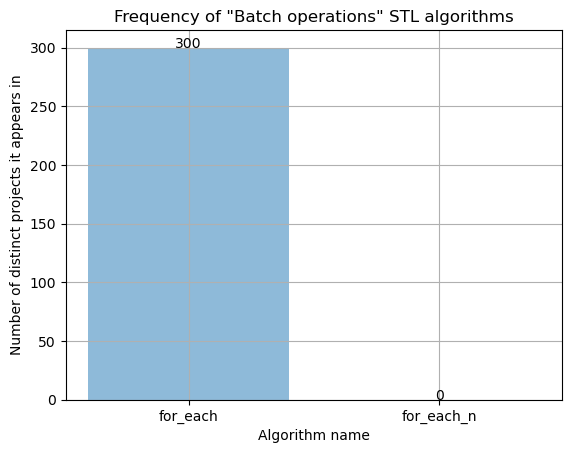

Plotting uses for Search operations
Nr of algos that are not used for Search operations: 1
values before plot
[('find', 789), ('find_if', 565), ('any_of', 209), ('equal', 197), ('count', 171), ('all_of', 142), ('count_if', 131), ('none_of', 61), ('search', 48), ('find_if_not', 45), ('mismatch', 36), ('adjacent_find', 35), ('find_first_of', 27), ('find_end', 14), ('search_n', 0)]


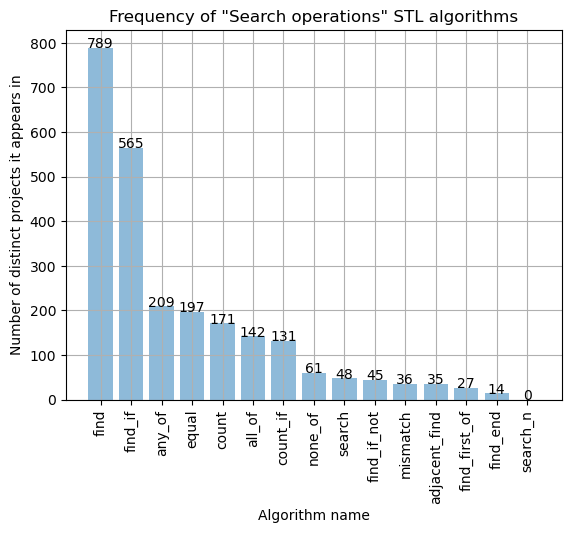

Plotting uses for Modifying sequence operations
Nr of algos that are not used for Modifying sequence operations: 2
values before plot
[('swap', 740), ('copy', 645), ('transform', 553), ('fill', 364), ('reverse', 354), ('remove_if', 288), ('remove', 227), ('unique', 225), ('replace', 171), ('fill_n', 149), ('copy_if', 89), ('move', 86), ('copy_n', 80), ('shuffle', 71), ('random_shuffle', 50), ('generate', 39), ('copy_backward', 34), ('iter_swap', 30), ('replace_if', 29), ('rotate', 29), ('generate_n', 21), ('reverse_copy', 21), ('remove_copy_if', 18), ('move_backward', 17), ('swap_ranges', 13), ('unique_copy', 8), ('remove_copy', 4), ('replace_copy', 2), ('replace_copy_if', 2), ('sample', 2), ('rotate_copy', 1)]


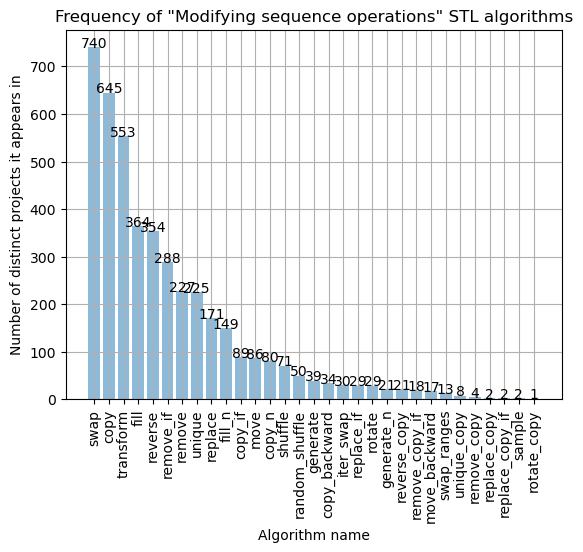

Plotting uses for Sorting and relation operations
Nr of algos that are not used for Sorting and relation operations: 3
values before plot
[('sort', 1091), ('lower_bound', 319), ('stable_sort', 245), ('upper_bound', 166), ('binary_search', 93), ('set_difference', 82), ('set_intersection', 80), ('nth_element', 76), ('pop_heap', 57), ('push_heap', 55), ('is_sorted', 46), ('make_heap', 46), ('partition', 40), ('equal_range', 38), ('set_union', 35), ('partial_sort', 34), ('stable_partition', 27), ('merge', 22), ('inplace_merge', 20), ('includes', 16), ('partial_sort_copy', 12), ('sort_heap', 11), ('set_symmetric_difference', 7), ('partition_point', 5), ('partition_copy', 2), ('is_heap', 2)]


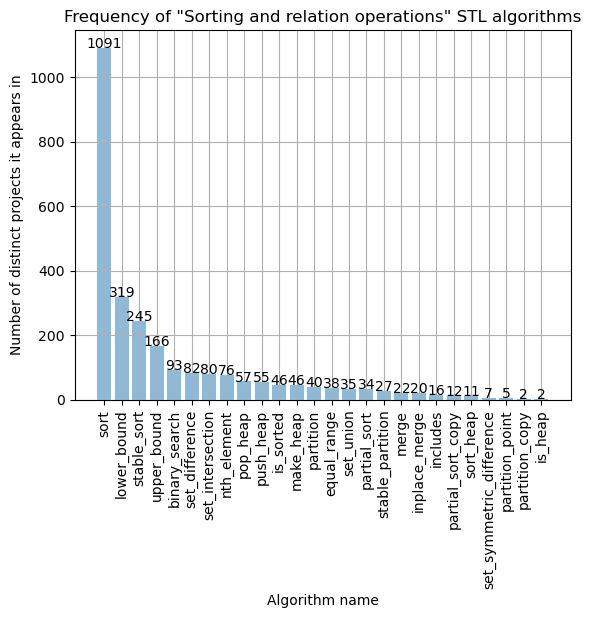

Plotting uses for Minimum/maximum operations
Nr of algos that are not used for Minimum/maximum operations: 0
values before plot
[('min', 1191), ('max', 1132), ('max_element', 223), ('min_element', 163), ('clamp', 43), ('minmax_element', 19), ('minmax', 11)]


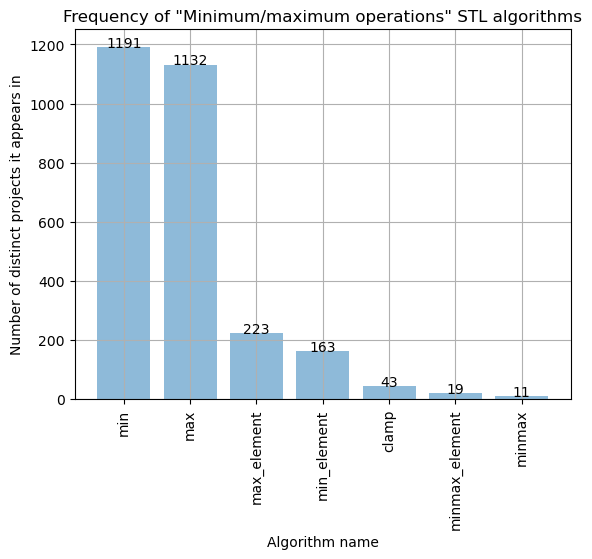

Plotting uses for Lexicographical comparison operations
Nr of algos that are not used for Lexicographical comparison operations: 1
values before plot
[('lexicographical_compare', 62), ('lexicographical_compare_three_way', 0)]


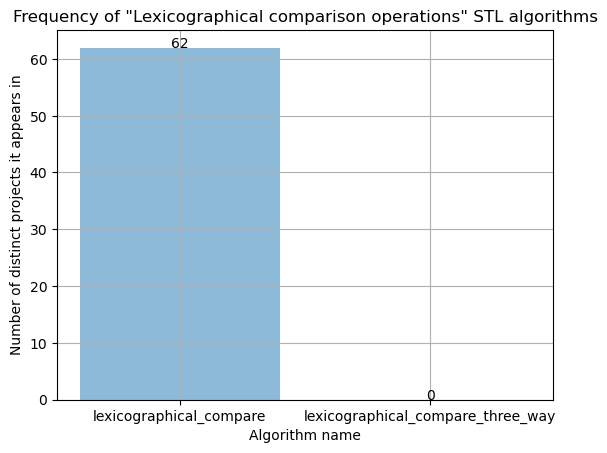

Plotting uses for Permutation operations
Nr of algos that are not used for Permutation operations: 0
values before plot
[('next_permutation', 19), ('is_permutation', 4), ('prev_permutation', 2)]


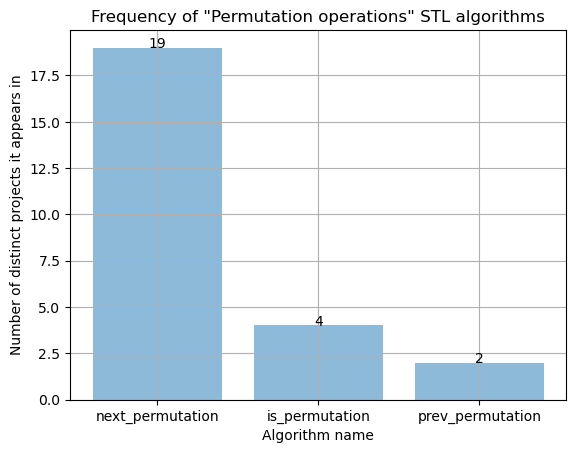

In [24]:
algo_names_by_kind = load_algo_names_by_kind()
for algo_kind, algo_names in algo_names_by_kind.items():
    plot_distinct_projects_by_kind(algo_kind, algo_names)

In [25]:
def box_plot_algo_usage(algo_name):
    # For each algorithm, count the number of times it appears in each project
    # Ignore the 0s
    # Box plot of when it is used, HOW MUCH is it actually used?

    print(f"Box plot for {algo_name}")

    values = []
    for pname, p in stats.items():
        if p.get("overall_features", None) is None:
            continue
        if p['overall_features'].get('algorithm type prevalence', None) is None:
            continue
        if p['overall_features']['algorithm type prevalence'].get(algo_name, None) is None:
            continue
        if p['overall_features']['algorithm type prevalence'][algo_name] == 0:
            continue
        values.append(p['overall_features']['algorithm type prevalence'][algo_name])
        
    plt.boxplot(values, patch_artist = True, showfliers = False)

    plt.title(f"Box plot for {algo_name} without outliers")
    plt.grid(True)
    plt.xticks([])
    plt.show()

    plt.boxplot(values, patch_artist = True, showfliers = True)

    plt.title(f"Box plot for {algo_name} appearences with outliers")
    plt.grid(True)
    plt.xticks([])
    plt.show()

def box_plot_algo_usage_by_kind(algo_kind):
    pass

Box plot for std::max


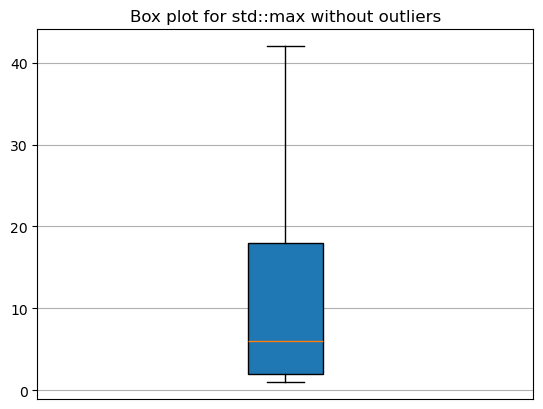

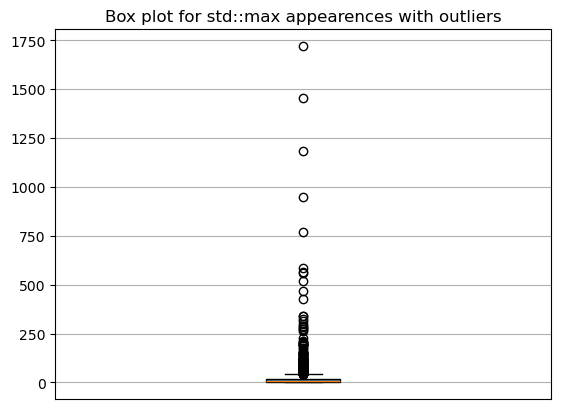

Box plot for std::min


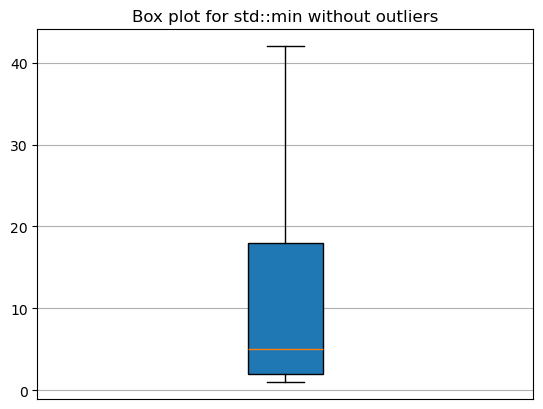

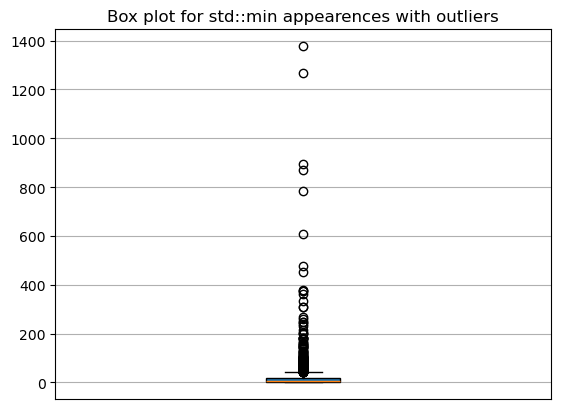

Box plot for std::swap


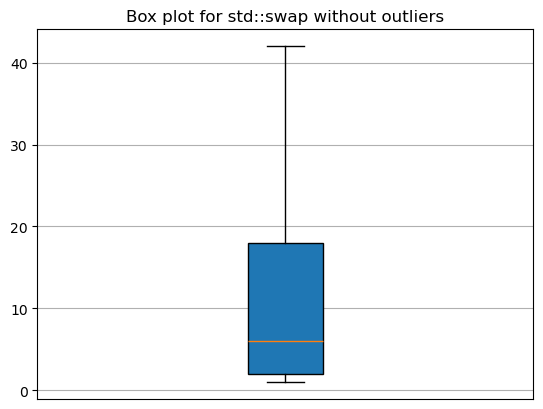

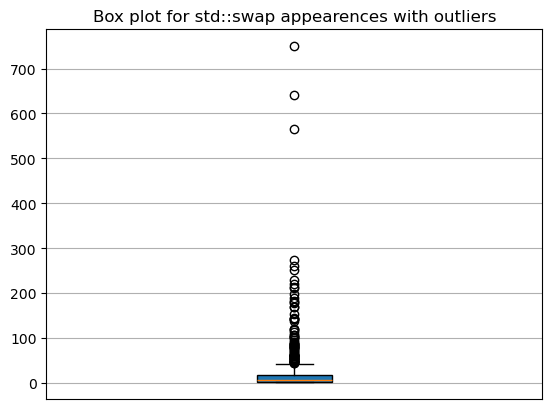

Box plot for std::sort


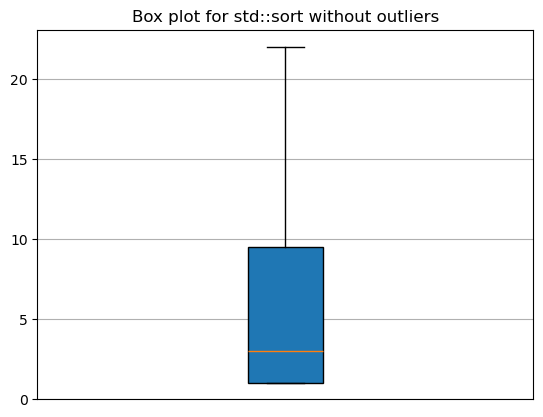

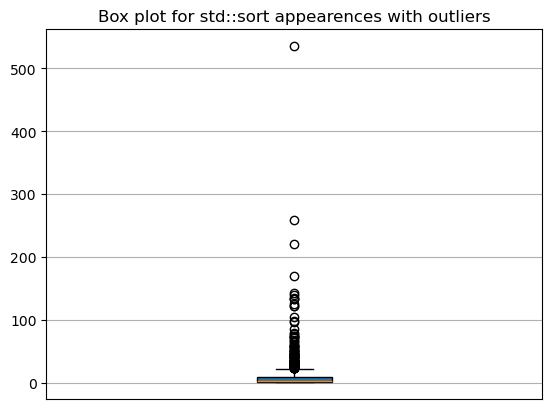

Box plot for std::find


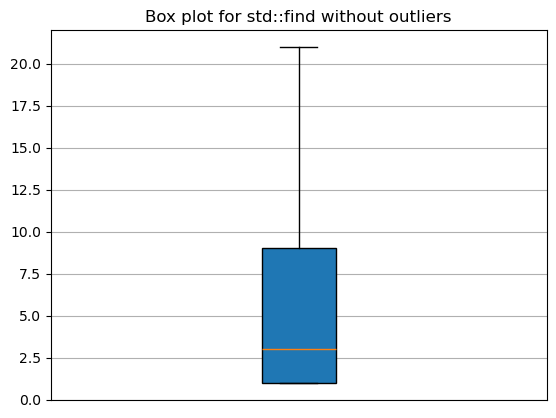

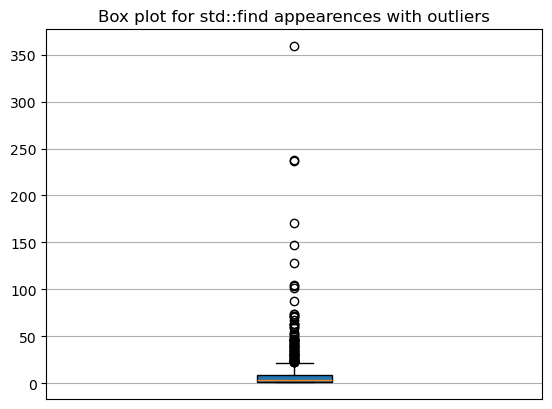

Box plot for std::copy


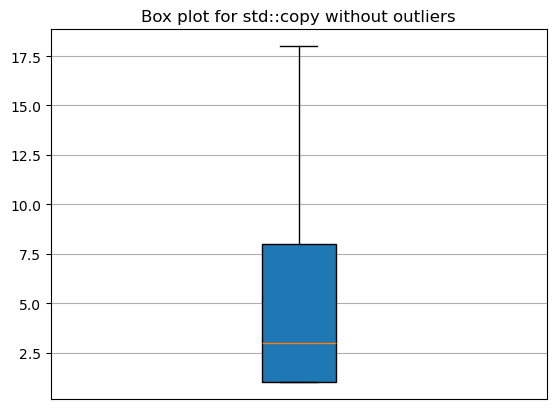

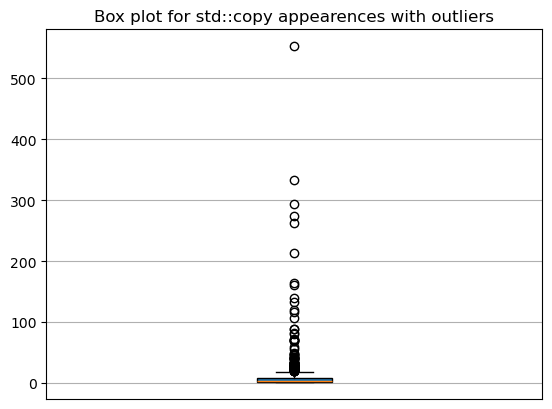

Box plot for std::find_if


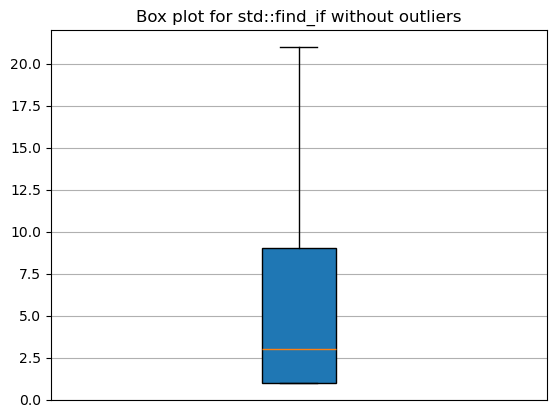

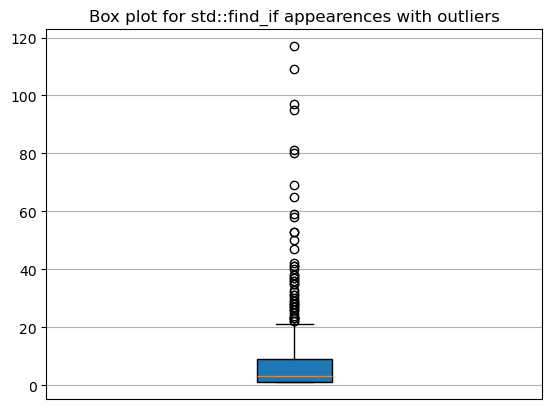

Box plot for std::transform


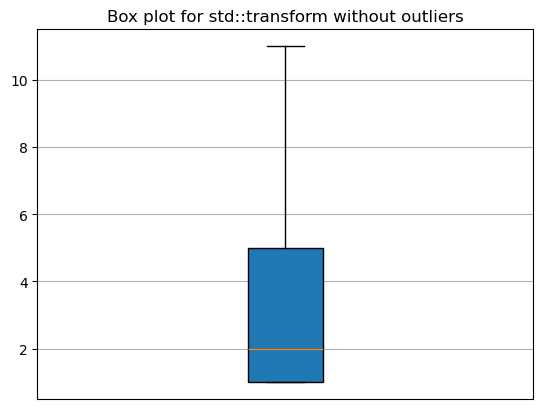

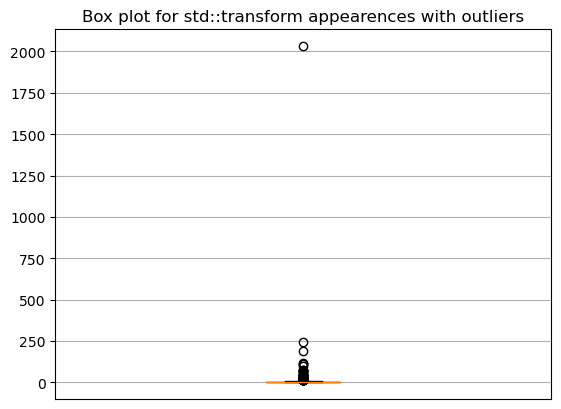

Box plot for std::for_each


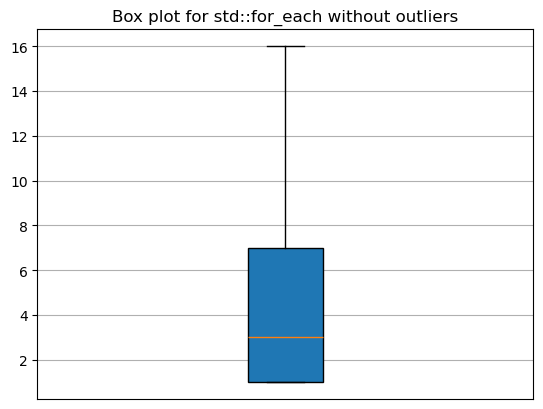

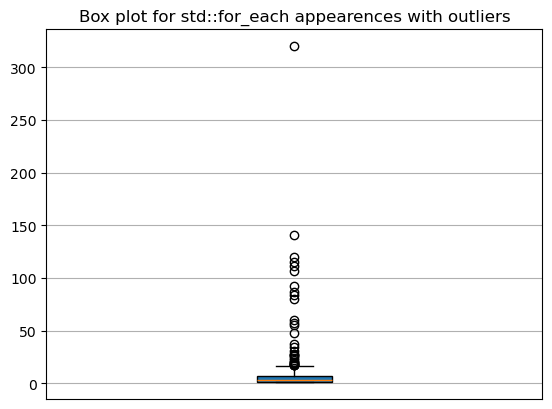

Box plot for std::move


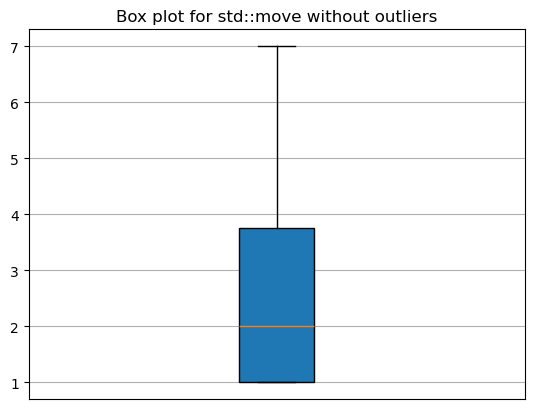

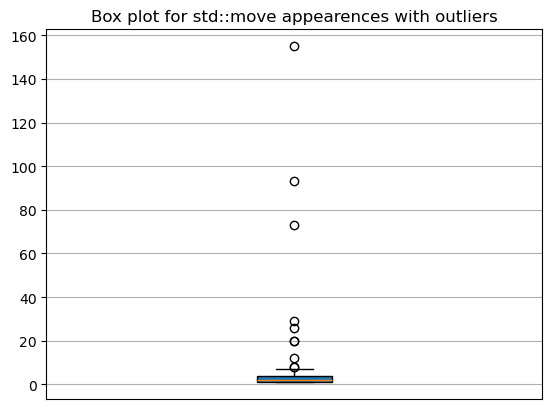

In [26]:
# box_plot_algo_usage(["std::max", "std::min", "std::sort"])
box_plot_algo_usage("std::max")
box_plot_algo_usage("std::min")
box_plot_algo_usage("std::swap")
box_plot_algo_usage("std::sort")
box_plot_algo_usage("std::find")
box_plot_algo_usage("std::copy")
box_plot_algo_usage("std::find_if")
box_plot_algo_usage("std::transform")
box_plot_algo_usage("std::for_each")
box_plot_algo_usage("std::move")

In [27]:


# projects_with_no_asts = dict()

# # go over all directories in analyze folder
# for project_name in os.listdir("/home/cdragancea/FBACode/analyze"):
#     if not os.path.isdir(join("/home/cdragancea/FBACode/analyze", project_name)):
#         continue

#     files_in_folder = os.listdir(join("/home/cdragancea/FBACode/analyze", project_name))
#     files_in_folder = [file for file in files_in_folder if file.endswith(".ast.json")]

#     if len(files_in_folder) == 0:
#         projects_with_no_asts[project_name] = 1

# print(len(projects_with_no_asts.keys()))

# with open("/home/cdragancea/FBACode/cache_no_asts.json", "w") as fout:
#     fout.write(json.dumps(projects_with_no_asts, indent = 2))

In [28]:
# lol = "null\nnull\n"

# with open("/home/cdragancea/FBACode/analyze/zutty/overall_stats", "r") as fin:
#     content = fin.read()

# print(content)
# print(lol == content)

In [29]:
# # go over all directories in analyze folder
# for project_name in os.listdir("/home/cdragancea/FBACode/analyze"):
#     if project_name not in projects_with_no_asts:
#         continue

#     if not exists(join("/home/cdragancea/FBACode/analyze", project_name, "overall_stats")):
#         projects_with_no_asts.pop(project_name)
#         continue

#     with open(join("/home/cdragancea/FBACode/analyze", project_name, "overall_stats"), "r") as fin:
#         content = fin.read()
    
#     if content != "null\nnull\n":
#         print(f"{project_name} doesn't have null null")


In [30]:

# with open("/home/cdragancea/FBACode/cache_no_asts.json", "w") as fout:
#     fout.write(json.dumps(projects_with_no_asts, indent = 2))

In [31]:
smart_ptr_usage = defaultdict(int)
smart_ptr_usage_distinct = defaultdict(int)
# nr_of_pointers_uses = [0 for pname in project_names]
nr_of_pointers_uses = []
SMART_PTR_NAMES = ["std::shared_ptr", "std::weak_ptr", "std::unique_ptr"]

with open("./data/smart_pointers/smart-pointers-per-project.txt", "w") as fout:
    fout.write("project_name,shared_ptr,weak_ptr,unique_ptr\n")
    smart_ptr_per_project = []
    for project_name in project_names:
        project = stats[project_name]
        if project['overall_features'] is None:
            # print(f"{project_name} has empty overall_features")
            nr_of_pointers_uses.append(0)
            smart_ptr_per_project.append((project_name, 0, 0, 0))
            continue

        if 'utility type prevalence' not in project['overall_features']:
            # print(f"{project_name} has no utility type prevalence")
            nr_of_pointers_uses.append(0)
            smart_ptr_per_project.append((project_name, 0, 0, 0))
            continue
        # print(f'project name: {project_name}')
        if project['overall_features']['utility type prevalence'] is None:
            # print(f"{project_name} has empty utility type prevalence")
            nr_of_pointers_uses.append(0)
            smart_ptr_per_project.append((project_name, 0, 0, 0))
            continue
        nr_of_pointers_uses.append(sum([v for (_, v) in project['overall_features']['utility type prevalence'].items()]))
        for smart_ptr_name, smart_ptr_uses in project['overall_features']['utility type prevalence'].items():
            if smart_ptr_name in SMART_PTR_NAMES:
                smart_ptr_usage[smart_ptr_name] += smart_ptr_uses
        smart_ptr_per_project.append((project_name, project['overall_features']['utility type prevalence'].get("std::shared_ptr", 0), project['overall_features']['utility type prevalence'].get("std::weak_ptr", 0), project['overall_features']['utility type prevalence'].get("std::unique_ptr", 0)))

    smart_ptr_per_project.sort(key=lambda x: x[1] + x[2] + x[3], reverse=True)
    for project_name, shared_ptr, weak_ptr, unique_ptr in smart_ptr_per_project:
        fout.write(f"{project_name},{shared_ptr},{weak_ptr},{unique_ptr}\n")

In [32]:
print(smart_ptr_usage)

defaultdict(<class 'int'>, {'std::shared_ptr': 237823, 'std::unique_ptr': 118515, 'std::weak_ptr': 2257})


Plotting uses for smart pointers


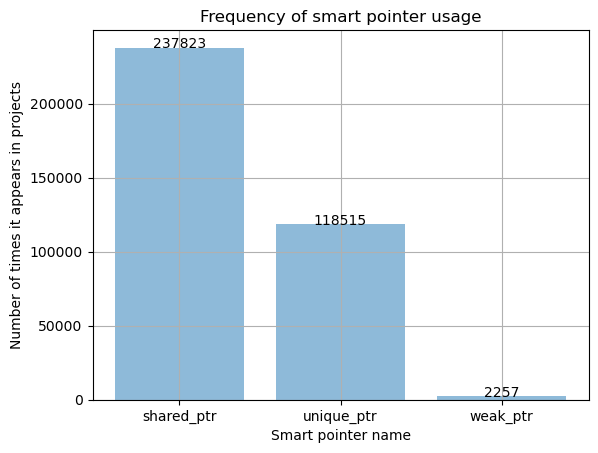

Plotting uses for smart pointers


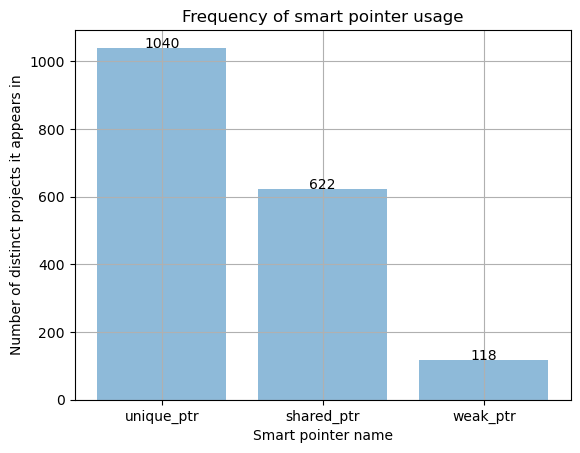

In [33]:
def plot_smart_ptr(smart_ptr_names):
    print(f"Plotting uses for smart pointers")
    
    values = []
    for smart_ptr in smart_ptr_names:
        projects = [p['overall_features']['utility type prevalence'][smart_ptr] for pname, p in stats.items() if p.get("overall_features", None) is not None and \
                    p['overall_features'].get('utility type prevalence', None) is not None and p['overall_features']['utility type prevalence'].get(smart_ptr, 0) > 0]
        values.append((smart_ptr, sum(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Smart pointer name')
    plt.ylabel('Number of times it appears in projects')
    plt.title(f'Frequency of smart pointer usage')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/smart pointers in projects.png", bbox_inches='tight')
    plt.show()

def plot_smart_ptr_distinct(smart_ptr_names):
    print(f"Plotting uses for smart pointers")
    
    values = []
    for smart_ptr in smart_ptr_names:
        projects = [p['overall_features']['utility type prevalence'][smart_ptr] for pname, p in stats.items() if p.get("overall_features", None) is not None and \
                    p['overall_features'].get('utility type prevalence', None) is not None and p['overall_features']['utility type prevalence'].get(smart_ptr, 0) > 0]
        values.append((smart_ptr, len(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Smart pointer name')
    plt.ylabel('Number of distinct projects it appears in')
    plt.title(f'Frequency of smart pointer usage')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/smart pointers in distinct projects.png", bbox_inches='tight')
    plt.show()

plot_smart_ptr(SMART_PTR_NAMES)
plot_smart_ptr_distinct(SMART_PTR_NAMES)

In [34]:
def box_plot_smart_ptr_usage(smart_ptr_name):
    # For each smart pointer, count the number of times it appears in each project
    # Ignore the 0s
    # Box plot of when it is used, HOW MUCH is it actually used?

    print(f"Box plot for {smart_ptr_name}")

    values = []
    for pname, p in stats.items():
        if p.get("overall_features", None) is None:
            continue
        if p['overall_features'].get('utility type prevalence', None) is None:
            continue
        if p['overall_features']['utility type prevalence'].get(smart_ptr_name, None) is None:
            continue
        if p['overall_features']['utility type prevalence'][smart_ptr_name] == 0:
            continue
        values.append(p['overall_features']['utility type prevalence'][smart_ptr_name])

    values = sorted(values)[:-5]

    plt.boxplot(values, patch_artist = True, showfliers = False)

    plt.title(f"Box plot for {smart_ptr_name} without outliers")
    plt.grid(True)
    plt.xticks([])
    plt.show()

    plt.boxplot(values, patch_artist = True, showfliers = True)

    plt.title(f"Box plot for {smart_ptr_name} with outliers")
    plt.grid(True)
    plt.xticks([])
    plt.show()

Box plot for std::shared_ptr


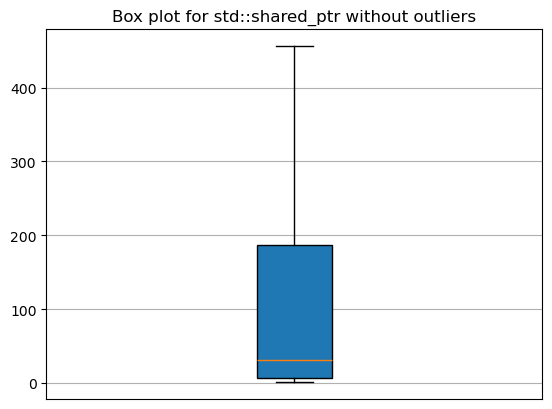

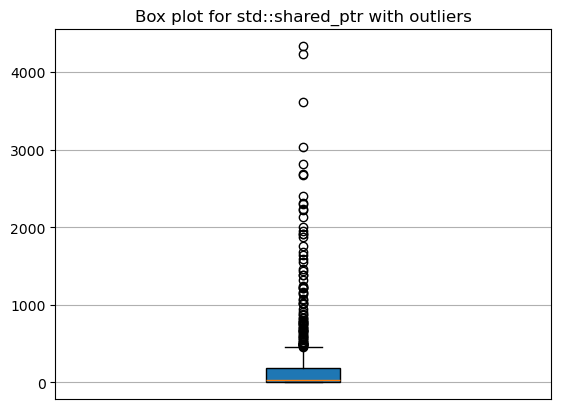

Box plot for std::weak_ptr


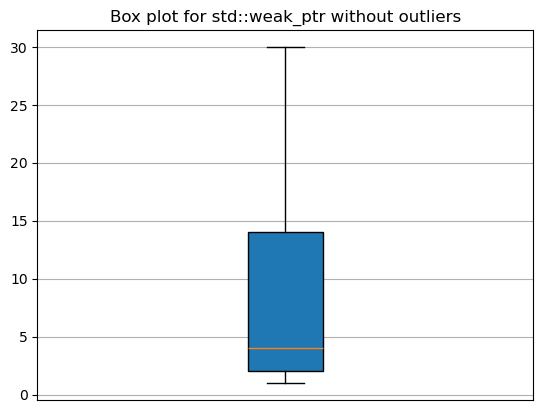

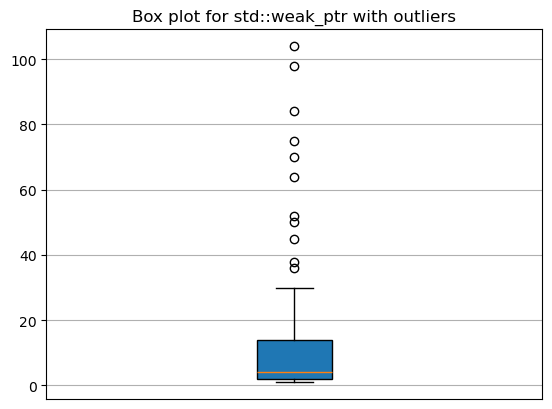

Box plot for std::unique_ptr


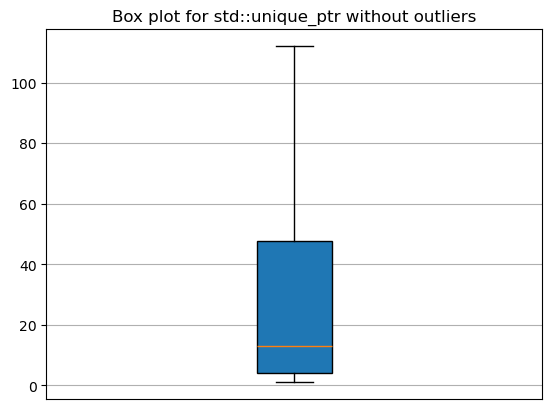

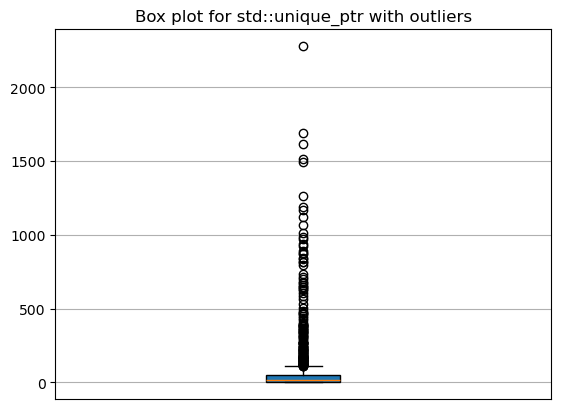

In [35]:
box_plot_smart_ptr_usage("std::shared_ptr")
box_plot_smart_ptr_usage("std::weak_ptr")
box_plot_smart_ptr_usage("std::unique_ptr")

In [36]:

def get_venn_smart_ptr_usage():
    venn_smart_ptr_usage = []
    for ss in range(1, (1 << len(SMART_PTR_NAMES))):
        print_flag = False

        smart_ptr_names = [SMART_PTR_NAMES[i] for i in range(len(SMART_PTR_NAMES)) if ss & (1 << i) > 0]
        smart_ptr_names_absent = [SMART_PTR_NAMES[i] for i in range(len(SMART_PTR_NAMES)) if ss & (1 << i) == 0]
        if len(smart_ptr_names) == 0:
            continue
        count = 0

        for pname, p in stats.items():
            if p.get("overall_features", None) is None:
                continue
            if p['overall_features'].get('utility type prevalence', None) is None:
                continue
            flag = True
            for smart_ptr_name in smart_ptr_names:
                if p['overall_features']['utility type prevalence'].get(smart_ptr_name, None) is None:
                    flag = False
                    continue
                if p['overall_features']['utility type prevalence'][smart_ptr_name] == 0:
                    flag = False
                    continue
            for smart_ptr_name in smart_ptr_names_absent:
                if p['overall_features']['utility type prevalence'].get(smart_ptr_name, None) is None:
                    continue
                if p['overall_features']['utility type prevalence'][smart_ptr_name] == 0:
                    continue
                flag = False
            if flag:
                if not print_flag:
                    print_flag = True
                    print(f"Project {pname} uses only {smart_ptr_names}")
                count += 1
        venn_smart_ptr_usage.append(count)

    return tuple(venn_smart_ptr_usage)

Project deviceinfo uses only ['std::shared_ptr']
Project pd-ableton-link uses only ['std::shared_ptr', 'std::weak_ptr']
Project pinentry uses only ['std::unique_ptr']
Project genomicsdb uses only ['std::shared_ptr', 'std::unique_ptr']
Project paho.mqtt.cpp uses only ['std::shared_ptr', 'std::weak_ptr', 'std::unique_ptr']


/home/constantin/mambaforge/envs/notebook-stuff/lib/python3.12/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


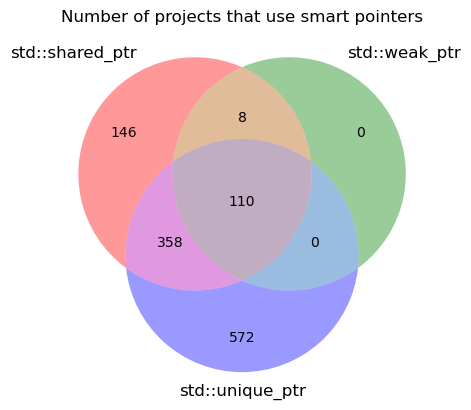

In [37]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_unweighted

# Example data
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])

# Create Venn diagram
# venn2([set1, set2], ('Set 1', 'Set 2'))
venn3_unweighted(subsets = get_venn_smart_ptr_usage(), set_labels = tuple(SMART_PTR_NAMES))




# Add labels
plt.title('Number of projects that use smart pointers')
# save plot
plt.savefig('./plots/venn_smart_pointers.png')
plt.show()


In [38]:
def investigate_smart_ptr_parameter_instantiation_type(smart_ptr_names):
    print(f"Investigating parameter instantiation type for {smart_ptr_names}")

    instantiation_types = dict()
    for smart_ptr in smart_ptr_names:
        instantiation_types[smart_ptr] = defaultdict(int)


    # Go through every *.ast.json in the analyze folder
    files = glob.glob(f"{FEATURES_FOLDER}/**/*.ast.json", recursive = True)
    for file in files:
        file_project_name = file.split("/")[6]
        if file_project_name not in stats:
            continue
        # if "telegram" in file:
            # print(f"Skipping the telegram-desktop project: {file}")
            # continue
        # print(f"File: {file}")
        try:
            with open(file, "r") as fin:
                data = json.load(fin)
        except Exception as e:
            print(f"Exception: {e}")
            print(f"Skipping file: {file}")
            continue
        
        if data.get("ula", None) is None:
            continue

        for smart_ptr in smart_ptr_names:
            if data["ula"].get("implicit class insts", None) is not None and smart_ptr in data["ula"]["implicit class insts"]:
                for appearence in data["ula"]["implicit class insts"][smart_ptr]:
                    # if len(appearence["arguments"]["non-type"]) == 0 or len(appearence["arguments"]["template"]) == 0:
                    #     continue
                    # if len(appearence["arguments"]["type"]) == 1:
                    #     continue
                    # instantiation_types[appearence["arguments"]["type"][0]] += 1
                    # instantiation_types[json.dumps(appearence["arguments"])] += 1
                    types_temp = deepcopy(appearence["arguments"]["type"])
                    types_temp = [parse_type(x) for x in types_temp]
                    instantiation_types[smart_ptr][json.dumps(types_temp)] += 1
            
            if data["ula"].get("explicit class insts", None) is not None and smart_ptr in data["ula"]["explicit class insts"]:
                for appearence in data["ula"]["explicit class insts"][smart_ptr]:
                    # if len(appearence["arguments"]["non-type"]) == 0 or len(appearence["arguments"]["template"]) == 0:
                    #     continue
                    # if len(appearence["arguments"]["type"]) == 1:
                    #     continue
                    # instantiation_types[appearence["arguments"]["type"][0]] += 1
                    # instantiation_types[json.dumps(appearence["arguments"])] += 1
                    types_temp = deepcopy(appearence["arguments"]["type"])
                    types_temp = [parse_type(x) for x in types_temp]
                    instantiation_types[smart_ptr][json.dumps(types_temp)] += 1
    
    for smart_ptr in smart_ptr_names:
        data = list(instantiation_types[smart_ptr].items())
        data = sorted(data, key = lambda x: x[1], reverse=True)
        # print(f"Number of different instantiation types: {len(instantiation_types)}")
        # for k,v in instantiation_types:
        #     print(f"{k} ::: {v}")
        
        with open(f"./data/smart_ptr_parameter_type/{smart_ptr}.txt", "w") as fout:
            fout.write(f"Number of different instantiation types: {len(data)}\n")
            fout.write(f"Total number of apparitions: {sum([x[1] for x in data])}\n")
            for k, v in data:
                fout.write(f"{v}  {k}\n")


In [39]:
investigate_smart_ptr_parameter_instantiation_type(SMART_PTR_NAMES)

Investigating parameter instantiation type for ['std::shared_ptr', 'std::weak_ptr', 'std::unique_ptr']


In [40]:
lol = [pname for pname, p in stats.items() if p.get("overall_features", None) is not None and p['overall_features'].get('algorithm type prevalence', None) is not None and p['overall_features']['algorithm type prevalence'].get("std::move", 0) > 0]
print(len(lol))

86


In [41]:
for_loop_usage = defaultdict(int)
for_loop_usage_distinct = defaultdict(int)
nr_of_loop_uses = []
LOOP_KINDS = ["for", "range-for", "while", "do-while"]

with open("./data/loop_kinds/for-loops-per-project.txt", "w") as fout:
    fout.write("project_name,for,range-for,while,do-while\n")
    loop_kinds_per_project = []
    for project_name in project_names:
        project = stats[project_name]
        if project['overall_features'] is None:
            # print(f"{project_name} has empty overall_features")
            nr_of_loop_uses.append(0)
            loop_kinds_per_project.append((project_name, 0, 0, 0, 0))
            continue

        if 'loop kind prevalences' not in project['overall_features']:
            # print(f"{project_name} has no utility type prevalence")
            nr_of_loop_uses.append(0)
            loop_kinds_per_project.append((project_name, 0, 0, 0, 0))
            continue
        # print(f'project name: {project_name}')
        if project['overall_features']['loop kind prevalences'] is None:
            # print(f"{project_name} has empty utility type prevalence")
            nr_of_loop_uses.append(0)
            loop_kinds_per_project.append((project_name, 0, 0, 0, 0))
            continue
        nr_of_loop_uses.append(sum([v for (_, v) in project['overall_features']['loop kind prevalences'].items()]))
        for loop_name, loop_uses in project['overall_features']['loop kind prevalences'].items():
            if loop_name in LOOP_KINDS:
                for_loop_usage[loop_name] += loop_uses
        
        loop_kinds_per_project.append((project_name, project['overall_features']['loop kind prevalences'].get("for", 0), project['overall_features']['loop kind prevalences'].get("range-for", 0), project['overall_features']['loop kind prevalences'].get("while", 0), project['overall_features']['loop kind prevalences'].get("do-while", 0)))
    
    loop_kinds_per_project.sort(key=lambda x: x[1] + x[2] + x[3] + x[4], reverse=True)
    for project_name, for_loop, range_for, while_loop, do_while in loop_kinds_per_project:
        fout.write(f"{project_name},{for_loop},{range_for},{while_loop},{do_while}\n")

In [42]:
print(for_loop_usage)

defaultdict(<class 'int'>, {'do-while': 1982963, 'for': 2305446, 'range-for': 190046, 'while': 425884})


Plotting uses for loop kinds
Plotting uses for loop kinds


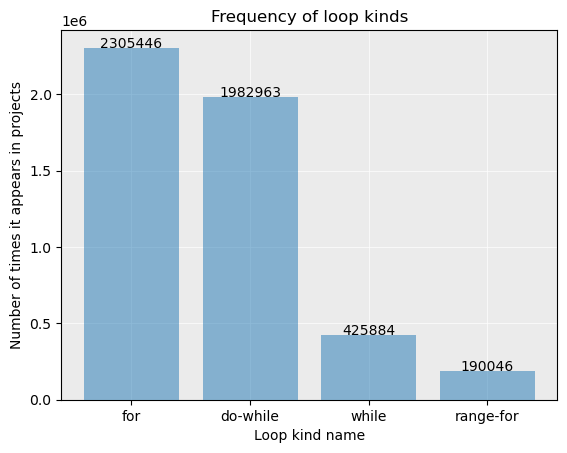

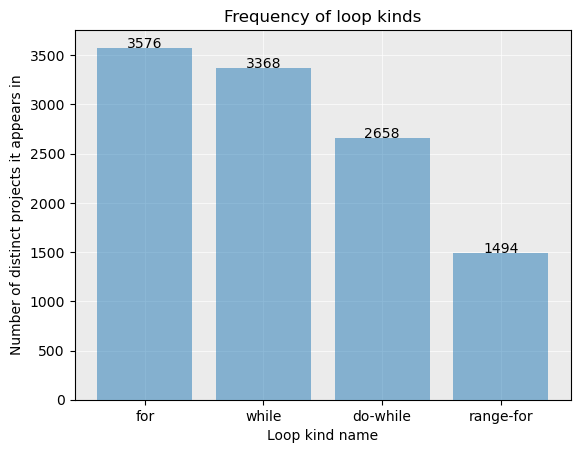

In [43]:
def plot_for_loops(loop_names):
    print(f"Plotting uses for loop kinds")
    
    values = []
    for loop_name in loop_names:
        projects = [p['overall_features']['loop kind prevalences'][loop_name] for pname, p in stats.items() if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('loop kind prevalences', None) is not None and p['overall_features']['loop kind prevalences'].get(loop_name, 0) > 0]
        values.append((loop_name, sum(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    
    # Plot the usage
    fig, ax = plt.subplots(1, 1)
    fig.patch.set_facecolor('xkcd:white')

    plt.grid(color='w', linestyle='-', linewidth=0.5, zorder=0)
    ax.set_facecolor((0.92, 0.92, 0.92))

    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5, zorder=3)
    plt.xlabel('Loop kind name')
    plt.ylabel('Number of times it appears in projects')
    plt.title(f'Frequency of loop kinds')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/loop kinds in projects.png", bbox_inches='tight')
    # plt.show()

def plot_for_loops_distinct(loop_names):
    print(f"Plotting uses for loop kinds")
    
    values = []
    for loop_name in loop_names:
        projects = [p['overall_features']['loop kind prevalences'][loop_name] for pname, p in stats.items() if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('loop kind prevalences', None) is not None and p['overall_features']['loop kind prevalences'].get(loop_name, 0) > 0]
        values.append((loop_name, len(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    fig, ax = plt.subplots(1, 1)
    fig.patch.set_facecolor('xkcd:white')

    plt.grid(color='w', linestyle='-', linewidth=0.5, zorder=0)
    ax.set_facecolor((0.92, 0.92, 0.92))
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5, zorder=3)
    plt.xlabel('Loop kind name')
    plt.ylabel('Number of distinct projects it appears in')
    plt.title(f'Frequency of loop kinds')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    # plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/loop kinds in distinct projects.png", bbox_inches='tight')
    # plt.show()

plot_for_loops(LOOP_KINDS)
plot_for_loops_distinct(LOOP_KINDS)

Project android-platform-tools-base uses neither for nor range-for
Project paho.mqtt.cpp uses both for and range-for
Project compton-conf uses only for
Project plasma-phonebook uses only range-for


/home/constantin/mambaforge/envs/notebook-stuff/lib/python3.12/site-packages/matplotlib_venn/_util.py:32: UserWarning: venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.
  warnings.warn(


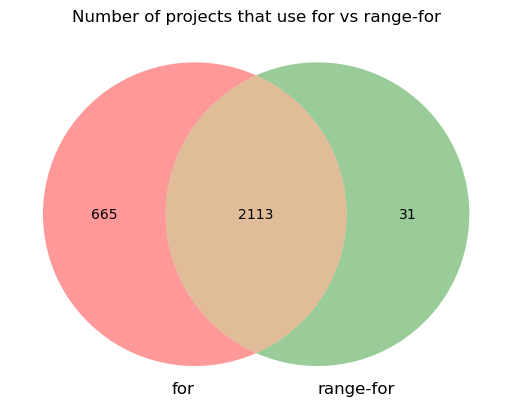

In [44]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_unweighted

def get_venn_for_loop_usage():
    for_vs_range_for = [0, 0, 0, 0]
    print_flag = [False, False, False, False]
    # just simple for loop
    for pname, project in stats.items():
        for_usage = 0
        range_for_usage = 0

        if project.get("overall_features", None) is not None and project['overall_features'].get('loop kind prevalences', None) is not None and project['overall_features']['loop kind prevalences'].get("for", 0) > 0:
            for_usage += 1
        
        if project.get("overall_features", None) is not None and project['overall_features'].get('loop kind prevalences', None) is not None and project['overall_features']['loop kind prevalences'].get("range-for", 0) > 0:
            range_for_usage += 1

        if for_usage > 0 and range_for_usage > 0:
            if not print_flag[3]:
                print_flag[3] = True
                print(f"Project {pname} uses both for and range-for")
            for_vs_range_for[3] += 1
        elif for_usage > 0:
            if not print_flag[1]:
                print_flag[1] = True
                print(f"Project {pname} uses only for")
            for_vs_range_for[2] += 1
        elif range_for_usage > 0:
            if not print_flag[2]:
                print_flag[2] = True
                print(f"Project {pname} uses only range-for")
            for_vs_range_for[1] += 1
        else:
            if not print_flag[0]:
                print_flag[0] = True
                print(f"Project {pname} uses neither for nor range-for")
            for_vs_range_for[0] += 1
    return for_vs_range_for

# Example data
# set1 = set(['A', 'B', 'C', 'D'])
# set2 = set(['B', 'C', 'D', 'E'])

# Create Venn diagram
# venn2([set1, set2], ('Set 1', 'Set 2'))
venn2_unweighted(subsets = get_venn_for_loop_usage(), set_labels = ("for", "range-for"))




# Add labels
plt.title('Number of projects that use for vs range-for')
# save plot
plt.savefig('./plots/for_vs_range_for.png')
plt.show()


In [45]:
alias_typedef_usage = defaultdict(int)
alias_typedef_usage_distinct = defaultdict(int)
nr_alias_typedef_uses = []
ALIAS_KINDS = ["typedef", "using", "templated typedef", "templated using"]

with open("./data/alias_kinds/alias-uses-per-project.txt", "w") as fout:
    fout.write("project_name,typedef,alias,typedef template,alias templates\n")
    alias_kinds_per_project = []
    for project_name in project_names:
        project = stats[project_name]
        if project['overall_features'] is None:
            # print(f"{project_name} has empty overall_features")
            nr_alias_typedef_uses.append(0)
            alias_kinds_per_project.append((project_name, 0, 0, 0, 0))
            continue

        if 'prevalence of typedef/using' not in project['overall_features']:
            # print(f"{project_name} has no utility type prevalence")
            nr_alias_typedef_uses.append(0)
            alias_kinds_per_project.append((project_name, 0, 0, 0, 0))
            continue
        # print(f'project name: {project_name}')
        if project['overall_features']['prevalence of typedef/using'] is None:
            # print(f"{project_name} has empty utility type prevalence")
            nr_alias_typedef_uses.append(0)
            alias_kinds_per_project.append((project_name, 0, 0, 0, 0))
            continue
        nr_alias_typedef_uses.append(sum([v for (_, v) in project['overall_features']['prevalence of typedef/using'].items()]))
        for alias_name, alias_uses in project['overall_features']['prevalence of typedef/using'].items():
            if alias_name in ALIAS_KINDS:
                alias_typedef_usage[alias_name] += alias_uses
        
    alias_kinds_per_project.sort(key=lambda x: x[1] + x[2] + x[3] + x[4], reverse=True)
    for project_name, typedef, alias, typedef_template, alias_template in alias_kinds_per_project:
        fout.write(f"{project_name},{typedef},{alias},{typedef_template},{alias_template}\n")


print(alias_typedef_usage)

defaultdict(<class 'int'>, {'typedef': 562789, 'using': 123083, 'templated typedef': 3916, 'templated using': 5004})


Plotting uses for alias kinds


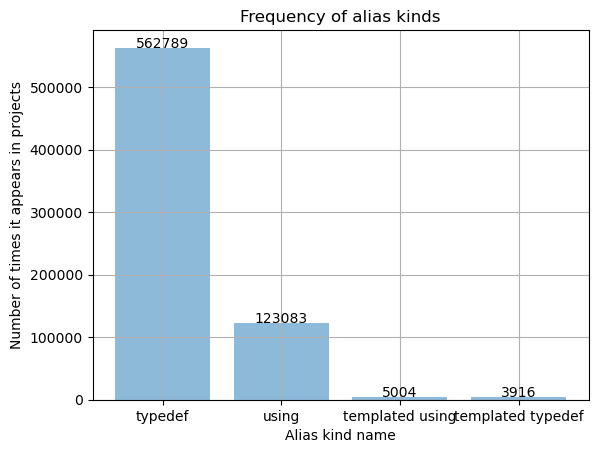

Plotting uses for loop kinds


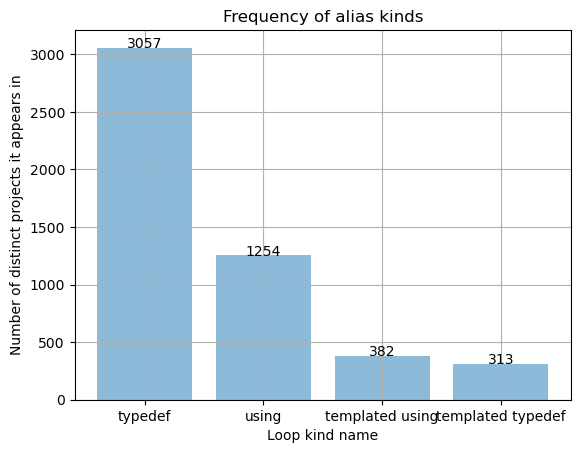

In [46]:
def plot_alias_typedef(alias_kinds):
    print(f"Plotting uses for alias kinds")
    
    values = []
    for alias_kind in alias_kinds:
        projects = [p['overall_features']['prevalence of typedef/using'][alias_kind] for pname, p in stats.items() if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('prevalence of typedef/using', None) is not None and p['overall_features']['prevalence of typedef/using'].get(alias_kind, 0) > 0]
        values.append((alias_kind, sum(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Alias kind name')
    plt.ylabel('Number of times it appears in projects')
    plt.title(f'Frequency of alias kinds')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/alias kinds in projects.png", bbox_inches='tight')
    plt.show()

def plot_alias_typedef_distinct(alias_kinds):
    print(f"Plotting uses for loop kinds")
    
    values = []
    for alias_kind in alias_kinds:
        projects = [p['overall_features']['prevalence of typedef/using'][alias_kind] for pname, p in stats.items() if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('prevalence of typedef/using', None) is not None and p['overall_features']['prevalence of typedef/using'].get(alias_kind, 0) > 0]
        values.append((alias_kind, len(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Loop kind name')
    plt.ylabel('Number of distinct projects it appears in')
    plt.title(f'Frequency of alias kinds')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/alias kinds in distinct projects.png", bbox_inches='tight')
    plt.show()

plot_alias_typedef(ALIAS_KINDS)
plot_alias_typedef_distinct(ALIAS_KINDS)

Project android-platform-tools-base uses neither typedef nor using
Project paho.mqtt.cpp uses only using
Project pluto-lunar uses only typedef
Project dolphin-emu uses both typedef and using


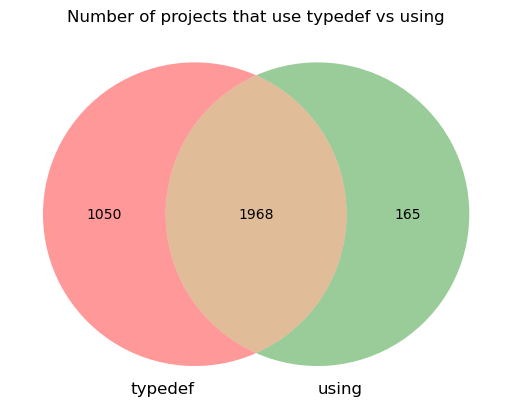

In [47]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_unweighted

def get_venn_alias_kind_usage():
    typedef_vs_using = [0, 0, 0, 0]
    print_flag = [False, False, False, False]

    # just simple for loop
    for pname, project in stats.items():
        typedef_usage = 0
        using_usage = 0

        if project.get("overall_features", None) is not None and project['overall_features'].get('prevalence of typedef/using', None) is not None and project['overall_features']['prevalence of typedef/using'].get("typedef", 0) > 0:
            typedef_usage += 1
        
        if project.get("overall_features", None) is not None and project['overall_features'].get('prevalence of typedef/using', None) is not None and project['overall_features']['prevalence of typedef/using'].get("using", 0) > 0:
            using_usage += 1
        
        if typedef_usage > 0 and using_usage > 0:
            if not print_flag[3]:
                print_flag[3] = True
                print(f"Project {pname} uses both typedef and using")
            typedef_vs_using[3] += 1
        elif typedef_usage > 0:
            if not print_flag[2]:
                print_flag[2] = True
                print(f"Project {pname} uses only typedef")
            typedef_vs_using[2] += 1
        elif using_usage > 0:
            if not print_flag[1]:
                print_flag[1] = True
                print(f"Project {pname} uses only using")
            typedef_vs_using[1] += 1
        else:
            if not print_flag[0]:
                print_flag[0] = True
                print(f"Project {pname} uses neither typedef nor using")
            typedef_vs_using[0] += 1

    return typedef_vs_using

# Create Venn diagram
# venn2([set1, set2], ('Set 1', 'Set 2'))
venn2_unweighted(subsets = get_venn_alias_kind_usage(), set_labels = ("typedef", "using"))




# Add labels
plt.title('Number of projects that use typedef vs using')
# save plot
plt.savefig('./plots/typedef_vs_using.png')
plt.show()


# Modern keywords usage analysis

Plotting uses for modern keywords


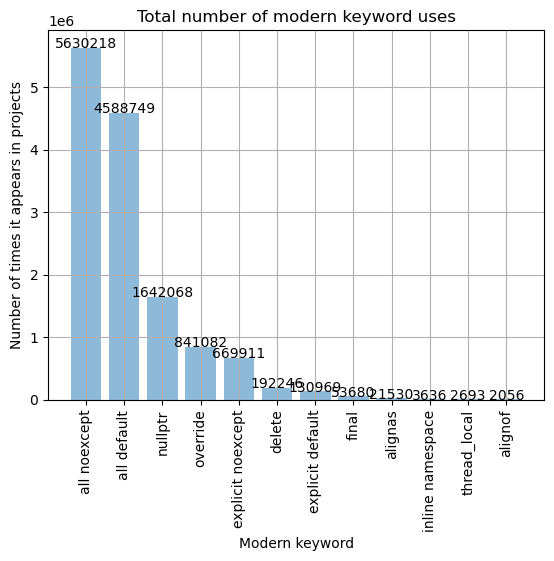

Plotting distinct uses for modern keywords


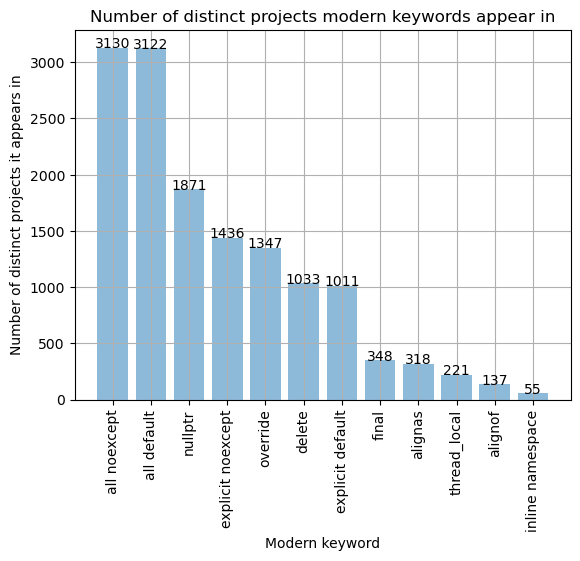

In [48]:
MODERN_KEYWORDS = ["alignas", "alignof", "all default", "explicit default", "delete", "final", "inline namespace", "all noexcept", "explicit noexcept", "nullptr", "thread_local", "override"]
# MODERN_KEYWORDS = ["default", "delete", "final", "noexcept"] # that have total_count
# MODERN_KEYWORDS = ["final"] # that have total_count

def plot_modern_keywords(keywords):
    print(f"Plotting uses for modern keywords")
    
    values = []
    for keyword in keywords:
        for project_name, p in stats.items():
            if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('modern keywords prevalence', None) is not None and \
                        p['overall_features']['modern keywords prevalence'].get(keyword, None) is not None and \
                            "total count" not in p['overall_features']['modern keywords prevalence'][keyword]:
                print(f"Project {project_name} doesn't have total count for {keyword}")
                return
        projects = [p['overall_features']['modern keywords prevalence'][keyword]["total count"] for pname, p in stats.items() if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('modern keywords prevalence', None) is not None and p['overall_features']['modern keywords prevalence'].get(keyword, None) is not None and p['overall_features']['modern keywords prevalence'][keyword].get("total count", 0) > 0]
        values.append((keyword, sum(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Modern keyword')
    plt.ylabel('Number of times it appears in projects')
    plt.title(f'Total number of modern keyword uses')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/modern keywords in projects.png", bbox_inches='tight')
    plt.show()

def plot_modern_keywords_distinct(keywords):
    print(f"Plotting distinct uses for modern keywords")
    
    values = []
    for keyword in keywords:
        for project_name, p in stats.items():
            if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('modern keywords prevalence', None) is not None and \
                        p['overall_features']['modern keywords prevalence'].get(keyword, None) is not None and \
                            "total count" not in p['overall_features']['modern keywords prevalence'][keyword]:
                print(f"Project {project_name} doesn't have total count for {keyword}")
                return

        projects = [p['overall_features']['modern keywords prevalence'][keyword]["total count"] for pname, p in stats.items() if p.get("overall_features", None) is not None \
                    and p['overall_features'].get('modern keywords prevalence', None) is not None and p['overall_features']['modern keywords prevalence'].get(keyword, None) is not None and p['overall_features']['modern keywords prevalence'][keyword].get("total count", 0) > 0]
        values.append((keyword, len(projects)))


    # values = [(name, nr_of_algo_uses[name]) for name in algo_names]
    values = sorted(values, key=lambda x: x[1], reverse=True)

    values = [(x[0].replace('std::', ''), x[1]) for x in values]

    x_axis = [x[0] for x in values]
    y_axis = [x[1] for x in values]
    # Plot the usage
    # plt.figure(figsize=(7, 9))
    plt.bar(x_axis, y_axis, align='center', alpha=0.5)
    plt.xlabel('Modern keyword')
    plt.ylabel('Number of distinct projects it appears in')
    plt.title(f'Number of distinct projects modern keywords appear in')
    plt.xticks(x_axis, rotation=90 if len(x_axis) > 6 else 0)
    plt.grid(True)

    for i, value in enumerate(values):
        plt.text(i, value[1], str(value[1]), ha='center')
    
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(f"./plots/modern keywords in distinct projects.png", bbox_inches='tight')
    plt.show()

plot_modern_keywords(MODERN_KEYWORDS)
plot_modern_keywords_distinct(MODERN_KEYWORDS)

In [49]:
# MODERN_KEYWORDS = ["alignas", "alignof", "default", "delete", "final", "inline namespace", "noexcept", "nullptr", "thread_local", "override"]

def count_keyword_use_per_project(keywords):
    for keyword in keywords:
        with open("./data/modern_keywords/" + keyword + " in projects.txt", "w") as fout:
            fout.write(f"Project name,Total count,Lines of C++\n")
            uses = [(pname, p['overall_features']['modern keywords prevalence'][keyword]["total count"]) for pname, p in stats.items() if p.get("overall_features", None) is not None and \
                    p['overall_features'].get('modern keywords prevalence', None) is not None and p['overall_features']['modern keywords prevalence'].get(keyword, None) is not None and \
                        "total count" in p['overall_features']['modern keywords prevalence'][keyword]]
            uses = sorted(uses, key=lambda x: x[1], reverse=True)
            total_use = 0
            for pname, use in uses:
                fout.write(f"{pname},{use},{sloc_info.get(pname, -1)}\n")
                total_use += use
            
            # print(f"Total use for {keyword}: {total_use}")
    
count_keyword_use_per_project(MODERN_KEYWORDS)

In [50]:
# def modern_keyword_histogram(keyword):
#     values = [p['overall_features']['modern keywords prevalence'][keyword]["total count"] for pname, p in stats.items() if p.get("overall_features", None) is not None and \
#                     p['overall_features'].get('modern keywords prevalence', None) is not None and p['overall_features']['modern keywords prevalence'].get(keyword, None) is not None and \
#                         "total count" in p['overall_features']['modern keywords prevalence'][keyword]]
    
    
#     counts, bin_edges, patches = plt.hist(values, bins=200)

#     counts = [int(x) for x in counts]
#     bin_edges = [int(x) for x in bin_edges]

#     print(sum([counts[i] * bin_edges[i] for i in range(len(counts))]))

#     print(counts)
#     print(bin_edges)
#     plt.xlabel('Number of uses')
#     plt.ylabel('Number of projects')
#     plt.title(f'Histogram of {keyword} uses')
#     plt.grid(True)
#     # prin frequency on top of each bin on the histogram
#     for i in range(0, 20):
#         plt.text(bin_edges[i], counts[i], str(counts[i]), ha='center')
#     # plt.savefig(f"./plots/histograms/{keyword}.png", bbox_inches='tight')
#     plt.show()

# modern_keyword_histogram("nullptr")

In [51]:
# PROJECT_PATH = "/home/cdragancea/FBACode/analyze/praat"

# overall_stats = dict()
# with open(join(PROJECT_PATH, 'overall_stats')) as f:
#     content = f.read()
# try:
#     overall_stats = json.loads(content)
# except json.JSONDecodeError as e:
#     str_err = str(e)
#     line = int(str_err.split()[3]) - 1

# individual_features = json.loads('\n'.join(content.split('\n')[:line]))
# overall_features = json.loads('\n'.join(content.split('\n')[line:]))
# overall_stats = {
#     'individual_features': individual_features,
#     'overall_features': overall_features
# }

# print(f"aggregated : {overall_stats['overall_features']['modern keywords prevalence']['nullptr']}")

# individual_uses = []
# for file, values in overall_stats['individual_features'].items():
#     individual_uses.append(values['modern keywords prevalence']['nullptr']['total count'])

# print(f"sum of individual: {sum(individual_uses)}")

In [52]:
# PROJECT_PATH = "/home/cdragancea/FBACode/analyze/proj"

# overall_stats = dict()

# feature_files = glob.iglob(join(PROJECT_PATH, '**/*.ast.json'), recursive=True)
# files_map = dict()
# files_map2 = dict()

# for file in feature_files:
#     with open(file, "r") as fin:
#         content = json.load(fin)
#     files_map[file] = content



In [53]:
# def get_possible_duplicates(keyword):
#     path_variations = dict()

#     for file, features in files_map.items():
#         if features.get("mka", None) is None:
#             continue
#         for apps in features["mka"][keyword]:
#             normalized_path = os.path.normpath(apps["GlobalLocation"].split(' ')[0])

#             pretty_path = ""

#             if " <Spelling=" in apps["GlobalLocation"]:
#                 spelling_path = apps["GlobalLocation"].split(" <Spelling=")[1][1:-1] # remove the last character which is a >

#                 normalized_spelling_path = os.path.normpath(spelling_path)

#                 pretty_path = f"{normalized_path} <Spelling={normalized_spelling_path}>"
#             else:
#                 pretty_path = normalized_path

#             if pretty_path not in path_variations:
#                 path_variations[pretty_path] = set()
#             path_variations[pretty_path].add(apps["GlobalLocation"])
    
#     total_count = 0
#     for path, variations in path_variations.items():
#         total_count += len(variations)
#         if len(variations) > 1 and " <Spelling=" in path:
#             print(f"Path: {path}")
#             for var in variations:
#                 print(f"  {var}")
#     print(f"total_count2 = {total_count}")

# get_possible_duplicates("default")

In [54]:
# def count_without_path_duplicates(keyword):
#     global files_map2
#     visited = set()
#     total_count = 0

#     files_map2 = copy.deepcopy(files_map)

#     for file, features in files_map.items():
#         if features.get("mka", None) is None:
#             continue
#         for i, apps in enumerate(features["mka"][keyword]):
#             normalized_path = os.path.normpath(apps["GlobalLocation"].split(' ')[0])

#             pretty_path = ""

#             if " <Spelling=" in apps["GlobalLocation"]:
#                 spelling_path = apps["GlobalLocation"].split(" <Spelling=")[1][1:-1] # remove the last character which is a >

#                 normalized_spelling_path = os.path.normpath(spelling_path)

#                 pretty_path = f"{normalized_path} <Spelling={normalized_spelling_path}>"
#             else:
#                 pretty_path = normalized_path

#             # normalized_path_with_spelling = ' '.join([normalized_path] + apps["GlobalLocation"].split(' ')[1:])
#             files_map2[file]["mka"][keyword][i]["GlobalLocation"] = pretty_path

#             if pretty_path not in visited:
#                 visited.add(pretty_path)
#                 total_count += 1
    
#     print(f"Total {keyword} count: {total_count}")

# count_without_path_duplicates("default")

In [55]:
# def get_possible_duplicates(keyword):
#     path_variations = dict()

#     for file, features in files_map2.items():
#         if features.get("mka", None) is None:
#             continue
#         for apps in features["mka"][keyword]:
#             normalized_path = os.path.normpath(apps["GlobalLocation"].split(' ')[0])

#             pretty_path = ""

#             if " <Spelling=" in apps["GlobalLocation"]:
#                 spelling_path = apps["GlobalLocation"].split(" <Spelling=")[1][1:-1] # remove the last character which is a >

#                 normalized_spelling_path = os.path.normpath(spelling_path)

#                 pretty_path = f"{normalized_path} <Spelling={normalized_spelling_path}>"
#             else:
#                 pretty_path = normalized_path

#             if pretty_path not in path_variations:
#                 path_variations[pretty_path] = set()
#             path_variations[pretty_path].add(apps["GlobalLocation"])
    
#     for path, variations in path_variations.items():
#         if len(variations) > 1:
#             print(f"Path: {path}")
#             for var in variations:
#                 print(f"  {var}")

# get_possible_duplicates("default")